In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,confusion_matrix,precision_score, recall_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import optuna

import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv("train_LZdllcl.csv")
test_data=pd.read_csv("test_2umaH9m.csv")
train_data.shape,test_data.shape

((54808, 14), (23490, 13))

In [3]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [6]:
train_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
test_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [8]:
train_data[train_data['previous_year_rating'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
56,45709,Sales & Marketing,region_31,Bachelor's,f,other,1,29,NaN,1,0,0,49,0
58,26599,Sales & Marketing,region_16,Bachelor's,m,other,2,27,NaN,1,1,0,47,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54703,74615,R&D,region_31,Bachelor's,m,sourcing,1,30,NaN,1,1,0,88,0
54734,11685,Operations,region_15,Bachelor's,m,sourcing,1,31,NaN,1,1,0,56,1
54746,10546,Finance,region_6,Bachelor's,m,other,1,28,NaN,1,1,0,61,0
54773,37919,Finance,region_2,Bachelor's,m,other,1,23,NaN,1,1,0,61,0


### Feature Engineering

In [9]:
# Function to transform data

def newdata(data):
    # Filling Previous Year Rating with 0 as their length of service is 1
    data['previous_year_rating']=data['previous_year_rating'].fillna(0)
    # Creating new column to identy whether the employee is fresher or experience based on previous rating
    data['Employee Type'] = data['previous_year_rating'].apply(lambda x: 'Fresher' if x==0 else 'Experience')
    data['education']=data['education'].fillna(method='ffill').fillna(method='bfill')
    
    return data
    

In [10]:
X_data = newdata(train_data)

In [11]:
Y_data = newdata(test_data)

In [15]:
Y_data
Y_data.shape, X_data.shape

((23490, 14), (54808, 15))

In [16]:
X_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
Employee Type           0
dtype: int64

# EDA

**1) Target Exploration**

In [17]:
X_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,Employee Type
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Experience
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Experience
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Experience
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,Experience
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,Experience


In [18]:
X_data['is_promoted'].value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

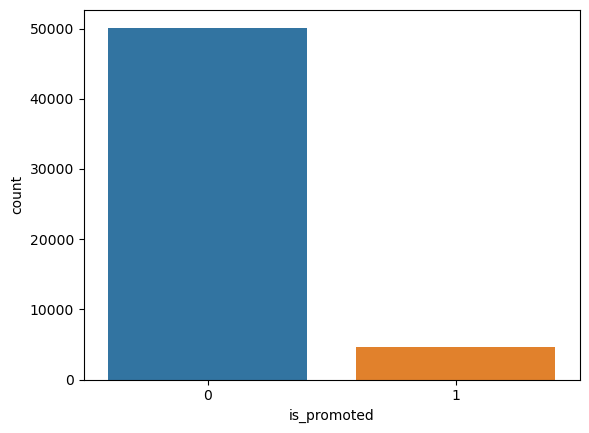

In [19]:
sns.countplot(X_data['is_promoted'],linewidth=3)

**Inference**
<br>
Highly Imbalance distribution of for getting promotion or not 

<AxesSubplot:>

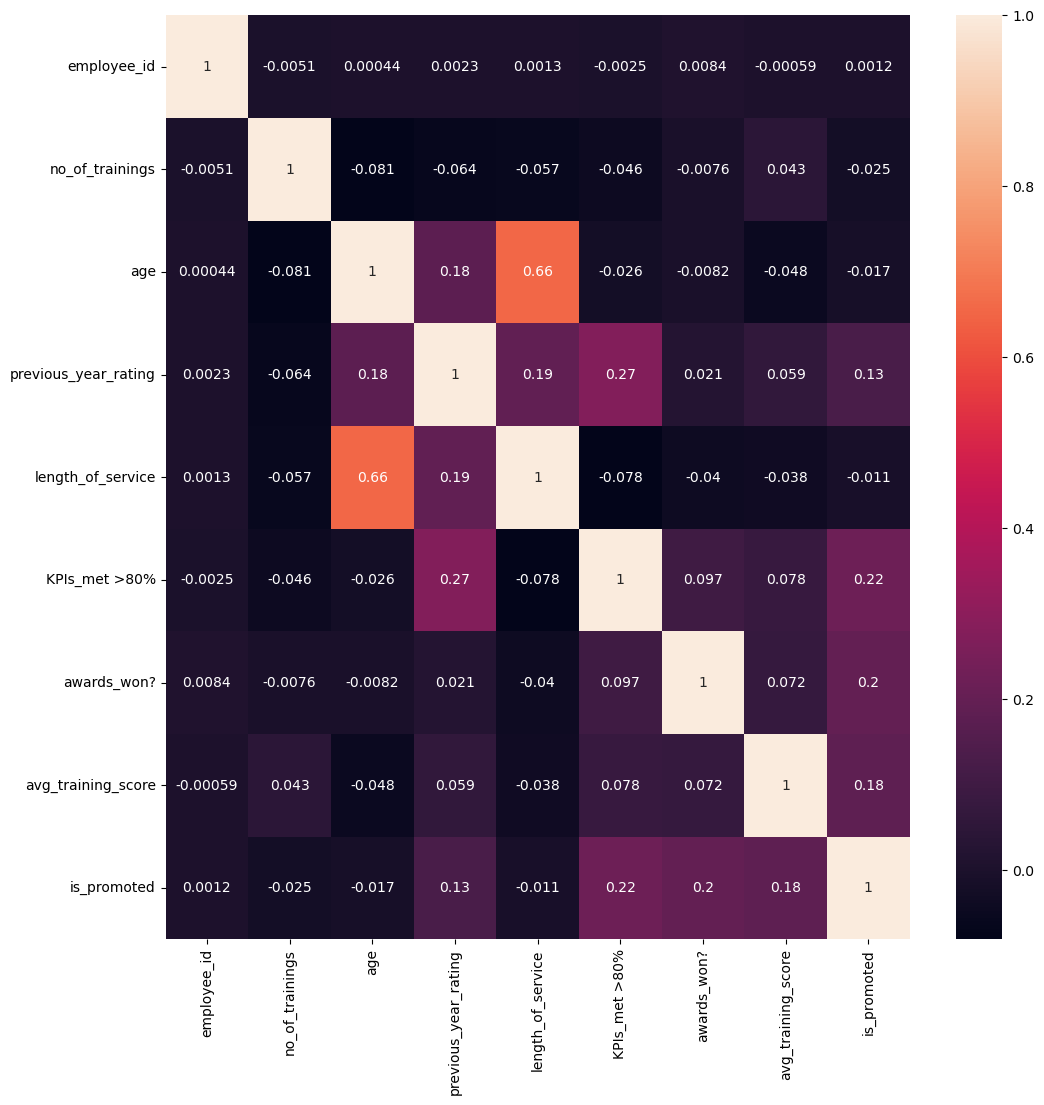

In [20]:
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(X_data.corr(),annot=True)

In [21]:
X_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
Employee Type            object
dtype: object

In [22]:
emp_detail = ['age']
emp_performance=['no_of_trainings','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score']

In [23]:
# Plotting graph to visualize

def Univariant(data,var_group):
    size=len(var_group)
  
    plt.figure(figsize=(10*size,10),dpi=100)
    for i,de in enumerate(var_group):
        mini=data[de].min()
        maxi=data[de].max()
        mean=data[de].mean()
        median=data[de].median()
        std_dev=data[de].std()
        skew=data[de].skew()
        kurt=data[de].kurtosis()
        
        # calculating points of standard deviation
        points = mean-std_dev, mean+std_dev
 
        plt.subplot(1,size,i+1)
        sns.kdeplot(data[de],shade=True)
        sns.scatterplot([mean],0,label='mean',color='red')
        sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
        sns.scatterplot([median],0,label='median',color='green')
        sns.scatterplot([mini,maxi],[0,0], label='min/max',color='blue')
        plt.xlabel('{}'.format(de),fontsize=20)
        plt.ylabel('Density')
        plt.title('skew={}; kurtosis={}, mean={},std_dev={},median={}'.format(round(skew,2),round(kurt,2),
                                                                             round(mean,2),(round(points[0],2),
                                                                            round(points[1],2)),round(median,2)),
                 fontsize=20)
        print('{} -skew={}; kurtosis={}, mean={},std_dev={},median={}'.format(de,round(skew,2),round(kurt,2),
                                                                             round(mean,2),(round(points[0],2),
                                                                            round(points[1],2)),round(median,2)))

no_of_trainings -skew=3.45; kurtosis=18.74, mean=1.25,std_dev=(0.64, 1.86),median=1.0
previous_year_rating -skew=-0.49; kurtosis=-0.6, mean=3.08,std_dev=(1.58, 4.58),median=3.0
length_of_service -skew=1.74; kurtosis=4.41, mean=5.87,std_dev=(1.6, 10.13),median=5.0
KPIs_met >80% -skew=0.62; kurtosis=-1.62, mean=0.35,std_dev=(-0.13, 0.83),median=0.0
awards_won? -skew=6.34; kurtosis=38.18, mean=0.02,std_dev=(-0.13, 0.17),median=0.0
avg_training_score -skew=0.45; kurtosis=-1.05, mean=63.39,std_dev=(50.02, 76.76),median=60.0


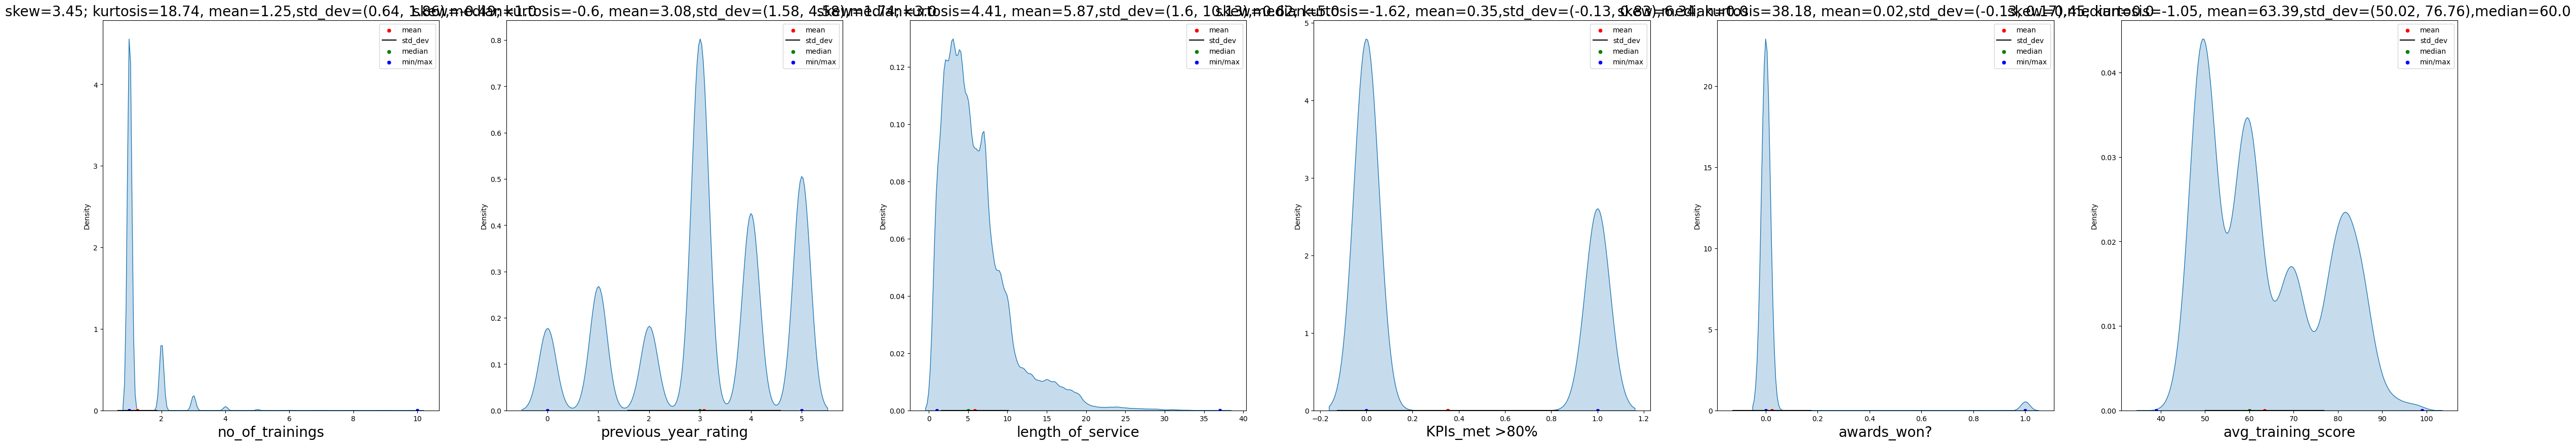

In [24]:
Univariant(X_data,emp_performance)

age -skew=1.01; kurtosis=0.79, mean=34.8,std_dev=(27.14, 42.46),median=33.0


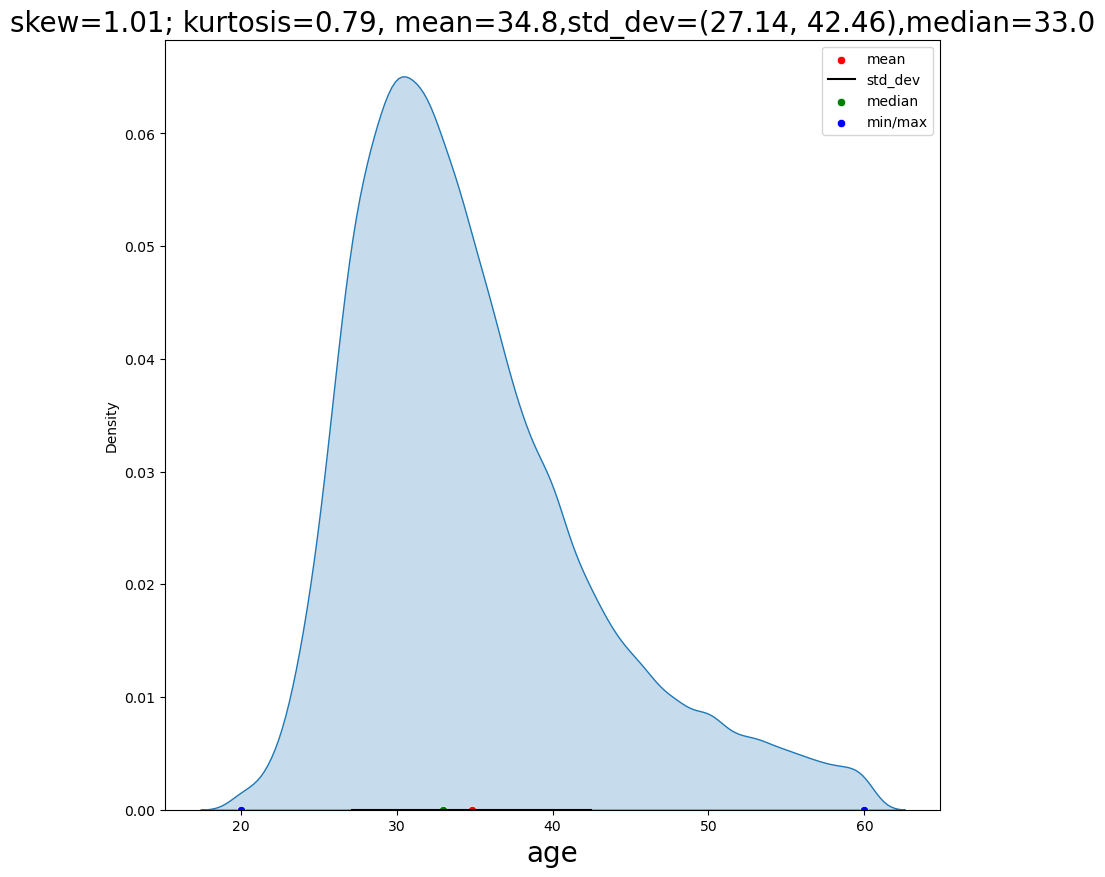

In [25]:
Univariant(X_data,emp_detail)

**INFERENCE**
<br>
Median Age is 33 and age distribution is from 27 to 42
<br>
Average rating is 3.08
<br>
As skewness for no_of_training, awards_won  does not lie in range (-0.6,0.6) indicates that it has outliers

In [26]:
X_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
Employee Type            object
dtype: object

<AxesSubplot:xlabel='count', ylabel='region'>

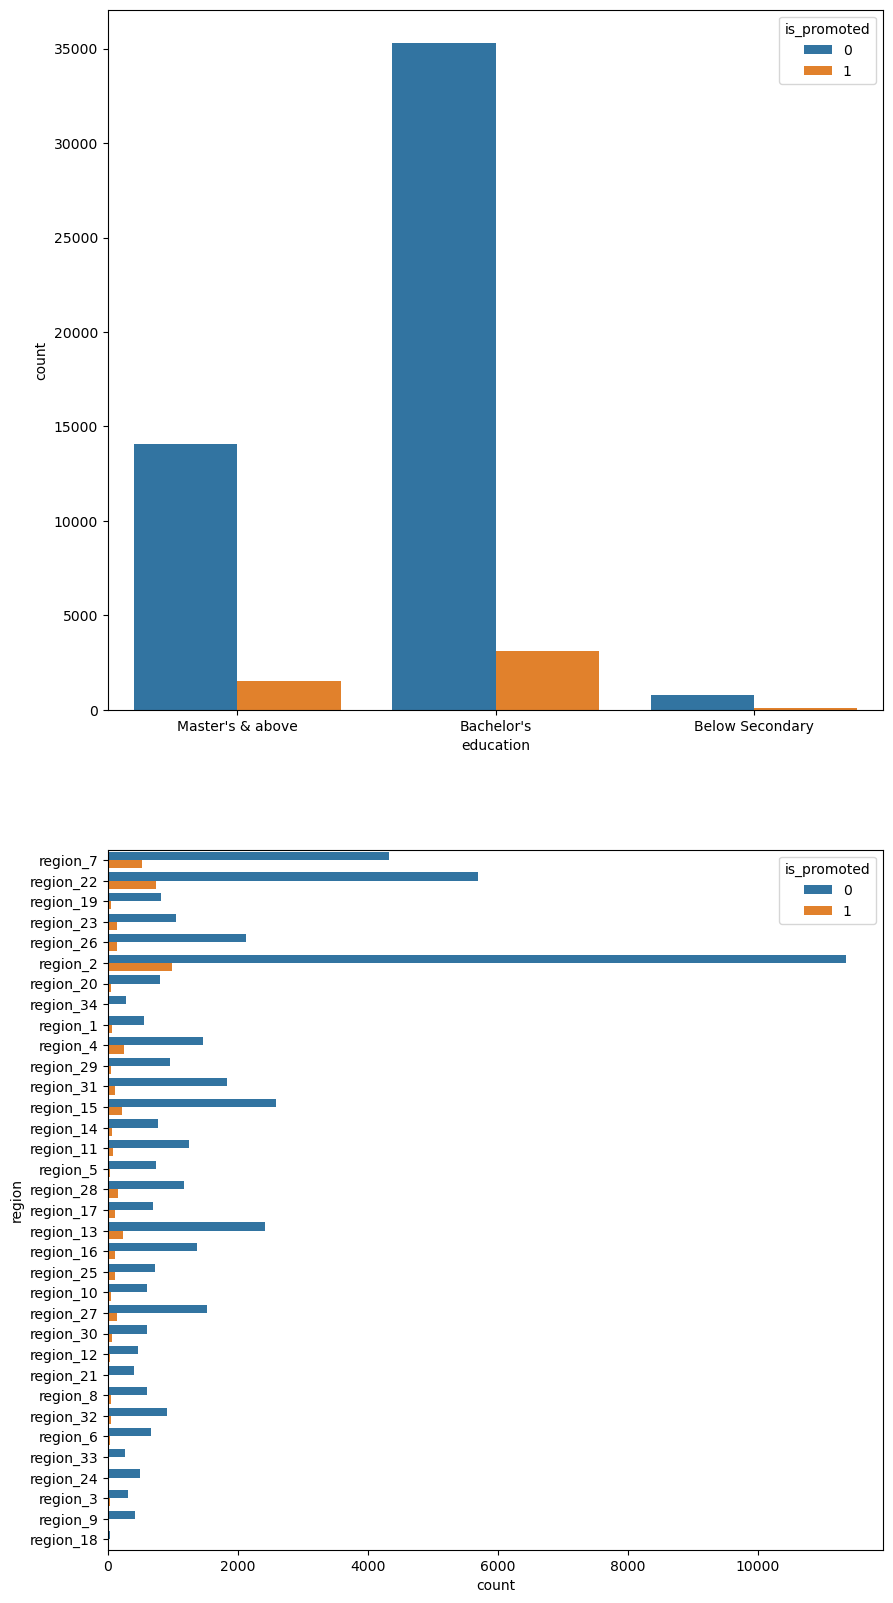

In [27]:
fg,ax = plt.subplots(2,1,figsize=(10,20))
sns.countplot(x=X_data['education'], hue=X_data['is_promoted'], data=X_data,ax=ax[0])
sns.countplot(y=X_data['region'], hue=X_data['is_promoted'], data=X_data,ax=ax[1],orient='h')

<AxesSubplot:xlabel='recruitment_channel', ylabel='is_promoted'>

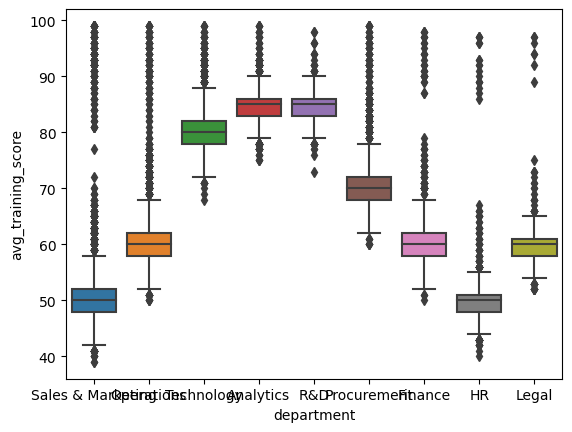

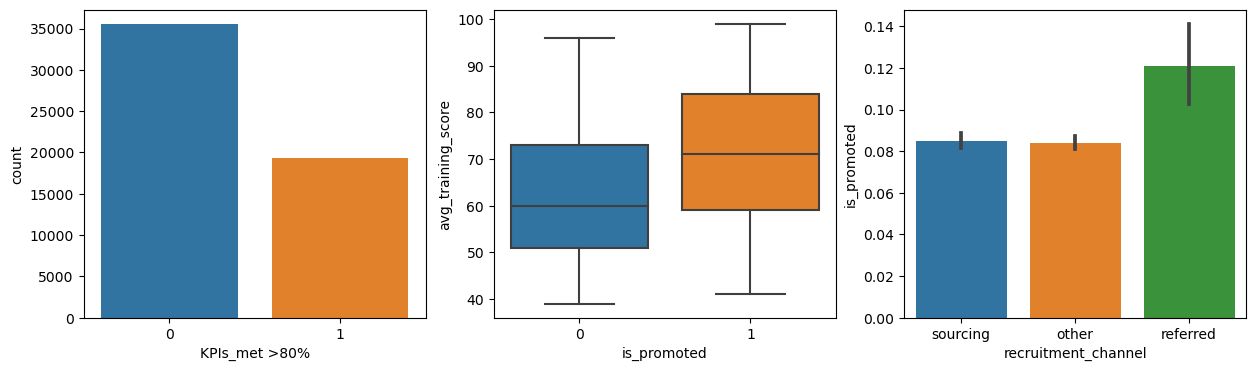

In [28]:

sns.boxplot(x=X_data['department'], y=X_data['avg_training_score'], data=X_data)

fg,ax=plt.subplots(1,3,figsize=(15,4))
sns.countplot(x=X_data['KPIs_met >80%'],ax=ax[0])
sns.boxplot(x='is_promoted',y='avg_training_score',data=X_data,ax=ax[1])
sns.barplot(y='is_promoted',x='recruitment_channel',data=X_data,ax=ax[2])

### Encoding Data

In [29]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [30]:
X_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
Employee Type            object
dtype: object

In [31]:
Y_data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
Employee Type            object
dtype: object

In [32]:
def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    if encoding_strategy == "LabelEncoding":
        print("IF LabelEncoding")
        Encoder = LabelEncoder()
        for column in encoding_columns :
            print("column",column )
            encoding_data[ column] = Encoder.fit_transform(tuple(encoding_data[column]))
    elif encoding_strategy == "OneHotEncoding":
        print("ELIF OneHotEncoding")
        encoding_data = pd.get_dummies(encoding_data)
    
    return encoding_data


In [33]:
encoding_columns  = [ "region","department", "gender", "education","recruitment_channel" ]
encoding_strategy = [ "LabelEncoding", "OneHotEncoding"]
X_encode = data_encoding( encoding_strategy[1] , X_data , encoding_columns )
Y_encode =  data_encoding( encoding_strategy[1] , Y_data  , encoding_columns )
# Display Encoded Train and Test Features :
display(X_encode.head())
display(Y_encode.head())

#Y_encode is test file data encoded. Need to remove employee-d column at end to match input with X_train(scaled)

ELIF OneHotEncoding
ELIF OneHotEncoding


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Analytics,...,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,Employee Type_Experience,Employee Type_Fresher
0,65438,1,35,5.0,8,1,0,49,0,0,...,0,0,1,1,0,0,0,1,1,0
1,65141,1,30,5.0,4,0,0,60,0,0,...,1,0,0,0,1,1,0,0,1,0
2,7513,1,34,3.0,7,0,0,50,0,0,...,1,0,0,0,1,0,0,1,1,0
3,2542,2,39,1.0,10,0,0,50,0,0,...,1,0,0,0,1,1,0,0,1,0
4,48945,1,45,3.0,2,0,0,73,0,0,...,1,0,0,0,1,1,0,0,1,0


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,...,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,Employee Type_Experience,Employee Type_Fresher
0,8724,1,24,0.0,1,1,0,77,0,0,...,1,0,0,0,1,0,0,1,0,1
1,74430,1,31,3.0,5,0,0,51,0,0,...,1,0,0,1,0,1,0,0,1,0
2,72255,1,31,1.0,4,0,0,47,0,0,...,1,0,0,0,1,1,0,0,1,0
3,38562,3,31,2.0,9,0,0,65,0,0,...,1,0,0,1,0,1,0,0,1,0
4,64486,1,30,4.0,7,0,0,61,0,1,...,1,0,0,0,1,0,0,1,1,0


In [34]:
# Segregating X and Y variable
X_data = X_encode.drop(["employee_id","is_promoted"],axis=1)
Y_sep= X_encode["is_promoted"]
X_data.shape, Y_data.shape

((54808, 60), (23490, 14))

In [35]:
# splitting data
X_train,X_test,Y_train,Y_test=train_test_split(X_data,Y_sep,random_state=1,stratify=Y_sep,train_size=0.70)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((38365, 60), (16443, 60), (38365,), (16443,))

In [36]:
X_train.dtypes

no_of_trainings                   int64
age                               int64
previous_year_rating            float64
length_of_service                 int64
KPIs_met >80%                     int64
awards_won?                       int64
avg_training_score                int64
department_Analytics              uint8
department_Finance                uint8
department_HR                     uint8
department_Legal                  uint8
department_Operations             uint8
department_Procurement            uint8
department_R&D                    uint8
department_Sales & Marketing      uint8
department_Technology             uint8
region_region_1                   uint8
region_region_10                  uint8
region_region_11                  uint8
region_region_12                  uint8
region_region_13                  uint8
region_region_14                  uint8
region_region_15                  uint8
region_region_16                  uint8
region_region_17                  uint8


In [37]:
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns] = MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    return scaling_data

In [38]:
scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler"]
X_train = data_scaling( scaling_strategy[0] , X_train , X_train.columns )
X_test  = data_scaling( scaling_strategy [0] , X_test  , X_test.columns )
# Display Scaled Train and Test Features :
display(X_train.head(2))
display(X_test.head(2))
print(X_train.shape,X_test.shape)

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,Employee Type_Experience,Employee Type_Fresher
49671,1.0,-0.8,0.0,-0.25,0.0,0.0,0.04,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41313,0.0,0.6,0.5,1.50,0.0,0.0,0.96,1.0,0.0,0.0,...,-1.0,0.0,1.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,Employee Type_Experience,Employee Type_Fresher
41040,0.0,-0.3,0.5,0.5,0.0,0.0,-0.32,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0
37459,0.0,1.1,-1.0,0.0,0.0,0.0,-0.72,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(38365, 60) (16443, 60)


# Baseline Logistic Regression, Decision Tree, Random Forest model without parameters

In [39]:
model=LogisticRegression()
model.fit(X_train,Y_train)
pred=model.predict(X_test)

In [40]:

f1=f1_score(pred,Y_test)


print("F1 score is",f1)



F1 score is 0.3918547055586131


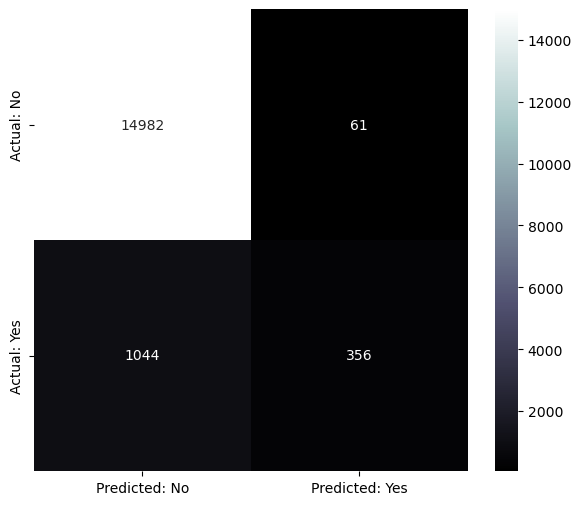

In [41]:
label_preds = pred

cm = confusion_matrix(Y_test,label_preds)


def plot_confusion_matrix(cm, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float')
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=['Predicted: No','Predicted: Yes'], yticklabels=['Actual: No','Actual: Yes'], cmap=cmap)

plot_confusion_matrix(cm, ['No', 'Yes'])

In [42]:
f1=f1_score(pred,Y_test)
re=recall_score(pred,Y_test)
precision = precision_score(Y_test,pred)
print("F1 score is",f1)
print("recall score is",re)
print("precesion score is",precision)

F1 score is 0.3918547055586131
recall score is 0.8537170263788969
precesion score is 0.8537170263788969


In [43]:
#using cross validation
def cv_score(ml_model, rstate = 12, thres = 0.5, cols = X_train.columns):
    i = 1
    cv_scores = []
    f1_scores=[]
    
    
    
    # 5 Fold cross validation stratified on the basis of target
    kf = StratifiedKFold(n_splits=5,random_state=rstate,shuffle=True)
    for df_index,test_index in kf.split(X_train,Y_train):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtrain,xtest = X_train.iloc[df_index],X_train.iloc[test_index]
        ytrain,ytest = Y_train.iloc[df_index],Y_train.iloc[test_index]
            
        # Define model for fitting on the training set for each fold
        model = ml_model
        model.fit(xtrain, ytrain)
        pred = model.predict(xtest)
        
       
         
        
        roc_score = roc_auc_score(ytest,pred)
        recall = recall_score(ytest,pred)
        precision = precision_score(ytest,pred)
        f1=f1_score(pred,ytest)
        sufix = ""
        msg = ""
        msg += "ROC AUC Score: {}, Recall Score: {:.4f}, Precision Score: {:.4f},f1: {:.4f} ".format(roc_score, recall,precision,f1)
        print("{}".format(msg))
         
         # Save scores
        cv_scores.append(roc_score)
        f1_scores.append(f1)
        i+=1
        
    if ml_model == 'RandomForestClassifier()':
        feature_imp= model.feature_importances_
        fd= pd.Series(model.feature_importances_, index=X_train.columns)
        print("Feature importance is",fd)
        
    print("\nMean score is:",np.array(f1_scores).mean())
    return f1_scores

In [44]:
LR_scores = cv_score(LogisticRegression())


1 of kfold 5
ROC AUC Score: 0.6219595729549787, Recall Score: 0.2496, Precision Score: 0.8030,f1: 0.3808 

2 of kfold 5
ROC AUC Score: 0.618843339746862, Recall Score: 0.2420, Precision Score: 0.8404,f1: 0.3757 

3 of kfold 5
ROC AUC Score: 0.612807721984844, Recall Score: 0.2309, Precision Score: 0.8032,f1: 0.3587 

4 of kfold 5
ROC AUC Score: 0.6326141626071305, Recall Score: 0.2706, Precision Score: 0.8233,f1: 0.4074 

5 of kfold 5
ROC AUC Score: 0.6219820339114497, Recall Score: 0.2492, Precision Score: 0.8150,f1: 0.3817 

Mean score is: 0.3808703852629514


In [45]:
dt_scores = cv_score(DecisionTreeClassifier())


1 of kfold 5
ROC AUC Score: 0.6947195281039079, Recall Score: 0.4487, Precision Score: 0.4133,f1: 0.4302 

2 of kfold 5
ROC AUC Score: 0.6967851642430508, Recall Score: 0.4548, Precision Score: 0.4085,f1: 0.4304 

3 of kfold 5
ROC AUC Score: 0.6953695582937183, Recall Score: 0.4480, Precision Score: 0.4216,f1: 0.4344 

4 of kfold 5
ROC AUC Score: 0.707568861800626, Recall Score: 0.4694, Precision Score: 0.4462,f1: 0.4575 

5 of kfold 5
ROC AUC Score: 0.7032475853003621, Recall Score: 0.4618, Precision Score: 0.4377,f1: 0.4494 

Mean score is: 0.44040222133200685


In [46]:
rf_scores = cv_score(RandomForestClassifier())


1 of kfold 5
ROC AUC Score: 0.6266427577300472, Recall Score: 0.2573, Precision Score: 0.8571,f1: 0.3958 

2 of kfold 5
ROC AUC Score: 0.6198049327452082, Recall Score: 0.2450, Precision Score: 0.8081,f1: 0.3760 

3 of kfold 5
ROC AUC Score: 0.6095359123532326, Recall Score: 0.2248, Precision Score: 0.7861,f1: 0.3496 

4 of kfold 5
ROC AUC Score: 0.6340007441575138, Recall Score: 0.2737, Precision Score: 0.8174,f1: 0.4101 

5 of kfold 5
ROC AUC Score: 0.6367026720395885, Recall Score: 0.2798, Precision Score: 0.8026,f1: 0.4150 

Mean score is: 0.38928358357510623


RMSE on train data:  0.9981623277182236
RMSE on test data:  0.4174653887113952


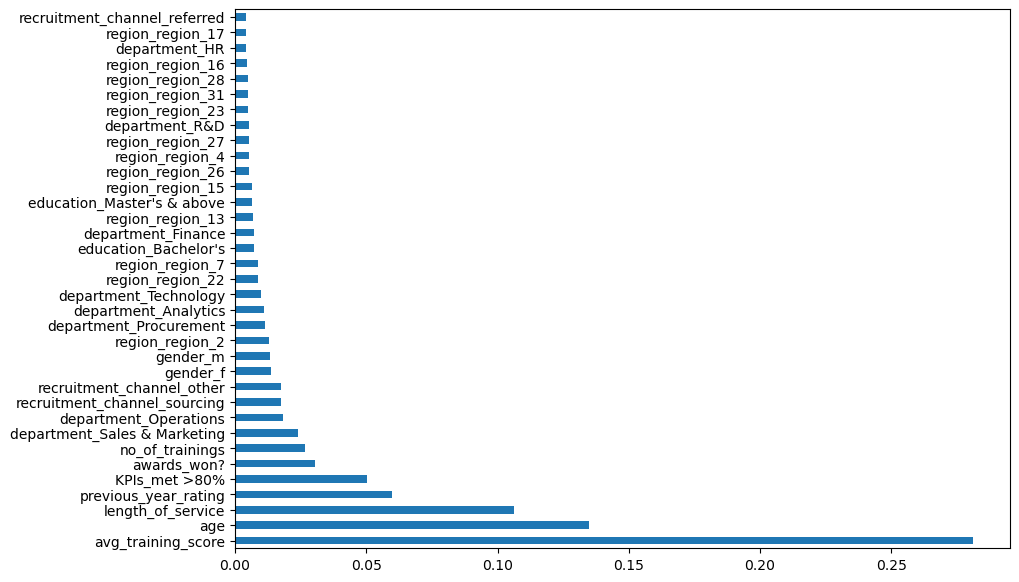

In [47]:
model_RFR = RandomForestClassifier()

# fit the model with the training data
model_RFR.fit(X_train, Y_train)

# predict the target on train and test data
predict_train = model_RFR.predict(X_train)
predict_test = model_RFR.predict(X_test)

# Root Mean Squared Error on train and test data
print('RMSE on train data: ', f1_score(Y_train, predict_train))
print('RMSE on test data: ',  f1_score(Y_test, predict_test))

plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = X_train.columns)
feat_importances.nlargest(35).plot(kind='barh');

In [48]:
xgb_score = cv_score(XGBClassifier())


1 of kfold 5
ROC AUC Score: 0.6732790364873059, Recall Score: 0.3507, Precision Score: 0.8876,f1: 0.5027 

2 of kfold 5
ROC AUC Score: 0.6755761268395266, Recall Score: 0.3553, Precision Score: 0.8889,f1: 0.5077 

3 of kfold 5
ROC AUC Score: 0.6668944233062466, Recall Score: 0.3379, Precision Score: 0.8840,f1: 0.4889 

4 of kfold 5
ROC AUC Score: 0.6847444006286126, Recall Score: 0.3746, Precision Score: 0.8719,f1: 0.5241 

5 of kfold 5
ROC AUC Score: 0.6800147742279257, Recall Score: 0.3654, Precision Score: 0.8628,f1: 0.5134 

Mean score is: 0.5073663055698648


In [49]:
lxgb_score = cv_score(LGBMClassifier())


1 of kfold 5
ROC AUC Score: 0.6736529408428336, Recall Score: 0.3492, Precision Score: 0.9461,f1: 0.5101 

2 of kfold 5
ROC AUC Score: 0.6672424662853452, Recall Score: 0.3369, Precision Score: 0.9283,f1: 0.4944 

3 of kfold 5
ROC AUC Score: 0.6617755084168658, Recall Score: 0.3257, Precision Score: 0.9342,f1: 0.4830 

4 of kfold 5
ROC AUC Score: 0.6840179974581879, Recall Score: 0.3700, Precision Score: 0.9453,f1: 0.5319 

5 of kfold 5
ROC AUC Score: 0.675465741088082, Recall Score: 0.3532, Precision Score: 0.9352,f1: 0.5128 

Mean score is: 0.5064148123434705


In [50]:
cat_score = cv_score(CatBoostClassifier())


1 of kfold 5
Learning rate set to 0.044452
0:	learn: 0.6413880	total: 176ms	remaining: 2m 55s
1:	learn: 0.5953735	total: 190ms	remaining: 1m 34s
2:	learn: 0.5563444	total: 199ms	remaining: 1m 6s
3:	learn: 0.5130294	total: 208ms	remaining: 51.8s
4:	learn: 0.4835439	total: 216ms	remaining: 43.1s
5:	learn: 0.4537984	total: 225ms	remaining: 37.2s
6:	learn: 0.4289875	total: 233ms	remaining: 33.1s
7:	learn: 0.4085472	total: 242ms	remaining: 30s
8:	learn: 0.3894594	total: 250ms	remaining: 27.6s
9:	learn: 0.3725854	total: 259ms	remaining: 25.6s
10:	learn: 0.3572280	total: 267ms	remaining: 24s
11:	learn: 0.3448124	total: 275ms	remaining: 22.7s
12:	learn: 0.3324550	total: 284ms	remaining: 21.5s
13:	learn: 0.3156718	total: 293ms	remaining: 20.6s
14:	learn: 0.3050131	total: 302ms	remaining: 19.8s
15:	learn: 0.2979441	total: 309ms	remaining: 19s
16:	learn: 0.2905385	total: 318ms	remaining: 18.4s
17:	learn: 0.2798846	total: 328ms	remaining: 17.9s
18:	learn: 0.2733411	total: 337ms	remaining: 17.4s
1

170:	learn: 0.1615798	total: 2.18s	remaining: 10.6s
171:	learn: 0.1613363	total: 2.19s	remaining: 10.6s
172:	learn: 0.1613251	total: 2.21s	remaining: 10.5s
173:	learn: 0.1612475	total: 2.22s	remaining: 10.5s
174:	learn: 0.1611805	total: 2.23s	remaining: 10.5s
175:	learn: 0.1611034	total: 2.24s	remaining: 10.5s
176:	learn: 0.1610124	total: 2.25s	remaining: 10.4s
177:	learn: 0.1609438	total: 2.26s	remaining: 10.4s
178:	learn: 0.1608907	total: 2.27s	remaining: 10.4s
179:	learn: 0.1608527	total: 2.28s	remaining: 10.4s
180:	learn: 0.1607244	total: 2.29s	remaining: 10.4s
181:	learn: 0.1606646	total: 2.3s	remaining: 10.3s
182:	learn: 0.1604863	total: 2.31s	remaining: 10.3s
183:	learn: 0.1604023	total: 2.32s	remaining: 10.3s
184:	learn: 0.1603030	total: 2.33s	remaining: 10.3s
185:	learn: 0.1601687	total: 2.34s	remaining: 10.3s
186:	learn: 0.1600961	total: 2.35s	remaining: 10.2s
187:	learn: 0.1600125	total: 2.36s	remaining: 10.2s
188:	learn: 0.1598664	total: 2.37s	remaining: 10.2s
189:	learn: 0

338:	learn: 0.1495614	total: 4.28s	remaining: 8.34s
339:	learn: 0.1495106	total: 4.29s	remaining: 8.32s
340:	learn: 0.1494718	total: 4.3s	remaining: 8.32s
341:	learn: 0.1494299	total: 4.32s	remaining: 8.31s
342:	learn: 0.1493971	total: 4.33s	remaining: 8.3s
343:	learn: 0.1492999	total: 4.35s	remaining: 8.29s
344:	learn: 0.1492497	total: 4.36s	remaining: 8.28s
345:	learn: 0.1492243	total: 4.37s	remaining: 8.27s
346:	learn: 0.1491259	total: 4.39s	remaining: 8.26s
347:	learn: 0.1490667	total: 4.4s	remaining: 8.25s
348:	learn: 0.1490242	total: 4.42s	remaining: 8.24s
349:	learn: 0.1489844	total: 4.42s	remaining: 8.22s
350:	learn: 0.1489460	total: 4.44s	remaining: 8.21s
351:	learn: 0.1488631	total: 4.45s	remaining: 8.2s
352:	learn: 0.1488043	total: 4.47s	remaining: 8.19s
353:	learn: 0.1487459	total: 4.48s	remaining: 8.18s
354:	learn: 0.1487069	total: 4.49s	remaining: 8.16s
355:	learn: 0.1486861	total: 4.5s	remaining: 8.15s
356:	learn: 0.1486389	total: 4.52s	remaining: 8.14s
357:	learn: 0.148

506:	learn: 0.1420283	total: 6.35s	remaining: 6.17s
507:	learn: 0.1419940	total: 6.36s	remaining: 6.16s
508:	learn: 0.1419450	total: 6.38s	remaining: 6.15s
509:	learn: 0.1419131	total: 6.39s	remaining: 6.14s
510:	learn: 0.1418573	total: 6.4s	remaining: 6.12s
511:	learn: 0.1418042	total: 6.41s	remaining: 6.11s
512:	learn: 0.1417483	total: 6.43s	remaining: 6.1s
513:	learn: 0.1417113	total: 6.44s	remaining: 6.09s
514:	learn: 0.1416926	total: 6.45s	remaining: 6.07s
515:	learn: 0.1416725	total: 6.46s	remaining: 6.06s
516:	learn: 0.1415948	total: 6.47s	remaining: 6.05s
517:	learn: 0.1415327	total: 6.48s	remaining: 6.03s
518:	learn: 0.1414735	total: 6.5s	remaining: 6.02s
519:	learn: 0.1414561	total: 6.51s	remaining: 6.01s
520:	learn: 0.1414200	total: 6.52s	remaining: 5.99s
521:	learn: 0.1414034	total: 6.53s	remaining: 5.98s
522:	learn: 0.1413500	total: 6.54s	remaining: 5.97s
523:	learn: 0.1413201	total: 6.55s	remaining: 5.96s
524:	learn: 0.1412989	total: 6.57s	remaining: 5.94s
525:	learn: 0.1

675:	learn: 0.1359622	total: 8.44s	remaining: 4.04s
676:	learn: 0.1359273	total: 8.45s	remaining: 4.03s
677:	learn: 0.1358881	total: 8.46s	remaining: 4.02s
678:	learn: 0.1358733	total: 8.48s	remaining: 4.01s
679:	learn: 0.1358230	total: 8.49s	remaining: 4s
680:	learn: 0.1357940	total: 8.5s	remaining: 3.98s
681:	learn: 0.1357809	total: 8.52s	remaining: 3.97s
682:	learn: 0.1357155	total: 8.53s	remaining: 3.96s
683:	learn: 0.1356656	total: 8.54s	remaining: 3.94s
684:	learn: 0.1356325	total: 8.55s	remaining: 3.93s
685:	learn: 0.1356115	total: 8.56s	remaining: 3.92s
686:	learn: 0.1355822	total: 8.57s	remaining: 3.9s
687:	learn: 0.1355330	total: 8.59s	remaining: 3.89s
688:	learn: 0.1354877	total: 8.6s	remaining: 3.88s
689:	learn: 0.1354766	total: 8.61s	remaining: 3.87s
690:	learn: 0.1354473	total: 8.62s	remaining: 3.85s
691:	learn: 0.1353993	total: 8.63s	remaining: 3.84s
692:	learn: 0.1353656	total: 8.64s	remaining: 3.83s
693:	learn: 0.1353274	total: 8.66s	remaining: 3.82s
694:	learn: 0.1352

839:	learn: 0.1309612	total: 10.3s	remaining: 1.97s
840:	learn: 0.1309306	total: 10.4s	remaining: 1.96s
841:	learn: 0.1309063	total: 10.4s	remaining: 1.95s
842:	learn: 0.1308929	total: 10.4s	remaining: 1.93s
843:	learn: 0.1308530	total: 10.4s	remaining: 1.92s
844:	learn: 0.1308035	total: 10.4s	remaining: 1.91s
845:	learn: 0.1307926	total: 10.4s	remaining: 1.9s
846:	learn: 0.1307801	total: 10.4s	remaining: 1.88s
847:	learn: 0.1307566	total: 10.4s	remaining: 1.87s
848:	learn: 0.1307303	total: 10.5s	remaining: 1.86s
849:	learn: 0.1306994	total: 10.5s	remaining: 1.85s
850:	learn: 0.1306767	total: 10.5s	remaining: 1.83s
851:	learn: 0.1306519	total: 10.5s	remaining: 1.82s
852:	learn: 0.1306283	total: 10.5s	remaining: 1.81s
853:	learn: 0.1305845	total: 10.5s	remaining: 1.8s
854:	learn: 0.1305626	total: 10.5s	remaining: 1.78s
855:	learn: 0.1305485	total: 10.5s	remaining: 1.77s
856:	learn: 0.1305198	total: 10.5s	remaining: 1.76s
857:	learn: 0.1305161	total: 10.6s	remaining: 1.75s
858:	learn: 0.

2:	learn: 0.5521624	total: 39.4ms	remaining: 13.1s
3:	learn: 0.5173321	total: 52.9ms	remaining: 13.2s
4:	learn: 0.4873922	total: 66ms	remaining: 13.1s
5:	learn: 0.4573827	total: 80.1ms	remaining: 13.3s
6:	learn: 0.4323853	total: 93.2ms	remaining: 13.2s
7:	learn: 0.4117727	total: 104ms	remaining: 12.9s
8:	learn: 0.3940185	total: 116ms	remaining: 12.8s
9:	learn: 0.3767376	total: 129ms	remaining: 12.8s
10:	learn: 0.3610418	total: 143ms	remaining: 12.9s
11:	learn: 0.3483188	total: 156ms	remaining: 12.9s
12:	learn: 0.3357844	total: 169ms	remaining: 12.8s
13:	learn: 0.3186031	total: 182ms	remaining: 12.8s
14:	learn: 0.3072657	total: 195ms	remaining: 12.8s
15:	learn: 0.3000773	total: 206ms	remaining: 12.7s
16:	learn: 0.2926104	total: 218ms	remaining: 12.6s
17:	learn: 0.2842922	total: 230ms	remaining: 12.6s
18:	learn: 0.2774707	total: 242ms	remaining: 12.5s
19:	learn: 0.2705161	total: 258ms	remaining: 12.7s
20:	learn: 0.2654715	total: 273ms	remaining: 12.7s
21:	learn: 0.2586454	total: 288ms	re

175:	learn: 0.1617965	total: 2.37s	remaining: 11.1s
176:	learn: 0.1617208	total: 2.38s	remaining: 11.1s
177:	learn: 0.1616320	total: 2.4s	remaining: 11.1s
178:	learn: 0.1615708	total: 2.41s	remaining: 11.1s
179:	learn: 0.1615099	total: 2.42s	remaining: 11s
180:	learn: 0.1614598	total: 2.44s	remaining: 11s
181:	learn: 0.1613625	total: 2.45s	remaining: 11s
182:	learn: 0.1612279	total: 2.46s	remaining: 11s
183:	learn: 0.1611043	total: 2.48s	remaining: 11s
184:	learn: 0.1610175	total: 2.49s	remaining: 11s
185:	learn: 0.1609509	total: 2.5s	remaining: 10.9s
186:	learn: 0.1608913	total: 2.51s	remaining: 10.9s
187:	learn: 0.1608223	total: 2.53s	remaining: 10.9s
188:	learn: 0.1607392	total: 2.54s	remaining: 10.9s
189:	learn: 0.1606544	total: 2.55s	remaining: 10.9s
190:	learn: 0.1606059	total: 2.56s	remaining: 10.9s
191:	learn: 0.1605404	total: 2.58s	remaining: 10.8s
192:	learn: 0.1604701	total: 2.59s	remaining: 10.8s
193:	learn: 0.1604322	total: 2.6s	remaining: 10.8s
194:	learn: 0.1603429	total

335:	learn: 0.1508215	total: 4.49s	remaining: 8.86s
336:	learn: 0.1507803	total: 4.5s	remaining: 8.85s
337:	learn: 0.1507518	total: 4.51s	remaining: 8.84s
338:	learn: 0.1506796	total: 4.53s	remaining: 8.84s
339:	learn: 0.1506315	total: 4.55s	remaining: 8.83s
340:	learn: 0.1505829	total: 4.56s	remaining: 8.82s
341:	learn: 0.1505463	total: 4.57s	remaining: 8.8s
342:	learn: 0.1504964	total: 4.58s	remaining: 8.78s
343:	learn: 0.1504615	total: 4.6s	remaining: 8.77s
344:	learn: 0.1504315	total: 4.61s	remaining: 8.76s
345:	learn: 0.1503907	total: 4.63s	remaining: 8.75s
346:	learn: 0.1503407	total: 4.64s	remaining: 8.73s
347:	learn: 0.1502981	total: 4.65s	remaining: 8.71s
348:	learn: 0.1501847	total: 4.66s	remaining: 8.7s
349:	learn: 0.1501359	total: 4.68s	remaining: 8.69s
350:	learn: 0.1500856	total: 4.69s	remaining: 8.67s
351:	learn: 0.1500385	total: 4.7s	remaining: 8.66s
352:	learn: 0.1500011	total: 4.72s	remaining: 8.65s
353:	learn: 0.1499377	total: 4.73s	remaining: 8.63s
354:	learn: 0.149

511:	learn: 0.1425586	total: 6.81s	remaining: 6.49s
512:	learn: 0.1424756	total: 6.83s	remaining: 6.48s
513:	learn: 0.1424436	total: 6.84s	remaining: 6.47s
514:	learn: 0.1424199	total: 6.85s	remaining: 6.46s
515:	learn: 0.1424076	total: 6.87s	remaining: 6.44s
516:	learn: 0.1423842	total: 6.88s	remaining: 6.42s
517:	learn: 0.1423525	total: 6.89s	remaining: 6.41s
518:	learn: 0.1423221	total: 6.9s	remaining: 6.4s
519:	learn: 0.1422717	total: 6.92s	remaining: 6.38s
520:	learn: 0.1422129	total: 6.93s	remaining: 6.37s
521:	learn: 0.1421792	total: 6.94s	remaining: 6.36s
522:	learn: 0.1421577	total: 6.95s	remaining: 6.34s
523:	learn: 0.1421309	total: 6.96s	remaining: 6.33s
524:	learn: 0.1420578	total: 6.98s	remaining: 6.31s
525:	learn: 0.1419510	total: 6.99s	remaining: 6.3s
526:	learn: 0.1419034	total: 7s	remaining: 6.28s
527:	learn: 0.1418710	total: 7.01s	remaining: 6.27s
528:	learn: 0.1418384	total: 7.02s	remaining: 6.25s
529:	learn: 0.1418166	total: 7.04s	remaining: 6.24s
530:	learn: 0.1417

684:	learn: 0.1363115	total: 9.1s	remaining: 4.18s
685:	learn: 0.1362245	total: 9.12s	remaining: 4.17s
686:	learn: 0.1361890	total: 9.13s	remaining: 4.16s
687:	learn: 0.1361699	total: 9.14s	remaining: 4.14s
688:	learn: 0.1361230	total: 9.15s	remaining: 4.13s
689:	learn: 0.1360854	total: 9.16s	remaining: 4.12s
690:	learn: 0.1360554	total: 9.18s	remaining: 4.1s
691:	learn: 0.1360340	total: 9.19s	remaining: 4.09s
692:	learn: 0.1359928	total: 9.2s	remaining: 4.08s
693:	learn: 0.1359637	total: 9.21s	remaining: 4.06s
694:	learn: 0.1359358	total: 9.23s	remaining: 4.05s
695:	learn: 0.1359047	total: 9.24s	remaining: 4.04s
696:	learn: 0.1358715	total: 9.26s	remaining: 4.02s
697:	learn: 0.1358243	total: 9.27s	remaining: 4.01s
698:	learn: 0.1358167	total: 9.28s	remaining: 4s
699:	learn: 0.1357762	total: 9.29s	remaining: 3.98s
700:	learn: 0.1357672	total: 9.31s	remaining: 3.97s
701:	learn: 0.1357514	total: 9.32s	remaining: 3.96s
702:	learn: 0.1357133	total: 9.33s	remaining: 3.94s
703:	learn: 0.1356

859:	learn: 0.1304555	total: 11.4s	remaining: 1.85s
860:	learn: 0.1304283	total: 11.4s	remaining: 1.84s
861:	learn: 0.1304081	total: 11.4s	remaining: 1.83s
862:	learn: 0.1303796	total: 11.4s	remaining: 1.81s
863:	learn: 0.1303596	total: 11.4s	remaining: 1.8s
864:	learn: 0.1303267	total: 11.5s	remaining: 1.79s
865:	learn: 0.1302896	total: 11.5s	remaining: 1.77s
866:	learn: 0.1302586	total: 11.5s	remaining: 1.76s
867:	learn: 0.1302345	total: 11.5s	remaining: 1.75s
868:	learn: 0.1301970	total: 11.5s	remaining: 1.73s
869:	learn: 0.1301880	total: 11.5s	remaining: 1.72s
870:	learn: 0.1301534	total: 11.5s	remaining: 1.71s
871:	learn: 0.1301273	total: 11.5s	remaining: 1.69s
872:	learn: 0.1301016	total: 11.6s	remaining: 1.68s
873:	learn: 0.1300652	total: 11.6s	remaining: 1.67s
874:	learn: 0.1300583	total: 11.6s	remaining: 1.65s
875:	learn: 0.1300396	total: 11.6s	remaining: 1.64s
876:	learn: 0.1300341	total: 11.6s	remaining: 1.63s
877:	learn: 0.1300202	total: 11.6s	remaining: 1.61s
878:	learn: 0

24:	learn: 0.2561097	total: 337ms	remaining: 13.1s
25:	learn: 0.2522850	total: 351ms	remaining: 13.1s
26:	learn: 0.2444316	total: 365ms	remaining: 13.1s
27:	learn: 0.2422028	total: 378ms	remaining: 13.1s
28:	learn: 0.2363939	total: 390ms	remaining: 13.1s
29:	learn: 0.2350412	total: 405ms	remaining: 13.1s
30:	learn: 0.2320585	total: 419ms	remaining: 13.1s
31:	learn: 0.2285917	total: 431ms	remaining: 13.1s
32:	learn: 0.2274983	total: 443ms	remaining: 13s
33:	learn: 0.2235282	total: 456ms	remaining: 13s
34:	learn: 0.2184999	total: 471ms	remaining: 13s
35:	learn: 0.2175090	total: 484ms	remaining: 13s
36:	learn: 0.2156364	total: 497ms	remaining: 12.9s
37:	learn: 0.2137983	total: 509ms	remaining: 12.9s
38:	learn: 0.2101435	total: 521ms	remaining: 12.8s
39:	learn: 0.2087380	total: 535ms	remaining: 12.8s
40:	learn: 0.2066510	total: 548ms	remaining: 12.8s
41:	learn: 0.2058495	total: 560ms	remaining: 12.8s
42:	learn: 0.2046003	total: 575ms	remaining: 12.8s
43:	learn: 0.2029056	total: 589ms	remai

197:	learn: 0.1597571	total: 2.66s	remaining: 10.8s
198:	learn: 0.1596710	total: 2.67s	remaining: 10.8s
199:	learn: 0.1596103	total: 2.69s	remaining: 10.8s
200:	learn: 0.1595649	total: 2.7s	remaining: 10.7s
201:	learn: 0.1594872	total: 2.71s	remaining: 10.7s
202:	learn: 0.1594300	total: 2.73s	remaining: 10.7s
203:	learn: 0.1593630	total: 2.74s	remaining: 10.7s
204:	learn: 0.1593098	total: 2.76s	remaining: 10.7s
205:	learn: 0.1592808	total: 2.77s	remaining: 10.7s
206:	learn: 0.1592103	total: 2.79s	remaining: 10.7s
207:	learn: 0.1591115	total: 2.8s	remaining: 10.7s
208:	learn: 0.1590222	total: 2.81s	remaining: 10.6s
209:	learn: 0.1589742	total: 2.82s	remaining: 10.6s
210:	learn: 0.1589180	total: 2.83s	remaining: 10.6s
211:	learn: 0.1588421	total: 2.85s	remaining: 10.6s
212:	learn: 0.1587876	total: 2.86s	remaining: 10.6s
213:	learn: 0.1586879	total: 2.87s	remaining: 10.6s
214:	learn: 0.1586433	total: 2.89s	remaining: 10.5s
215:	learn: 0.1585665	total: 2.9s	remaining: 10.5s
216:	learn: 0.1

361:	learn: 0.1491666	total: 4.73s	remaining: 8.33s
362:	learn: 0.1491257	total: 4.74s	remaining: 8.33s
363:	learn: 0.1490620	total: 4.76s	remaining: 8.32s
364:	learn: 0.1490052	total: 4.78s	remaining: 8.31s
365:	learn: 0.1490027	total: 4.79s	remaining: 8.29s
366:	learn: 0.1489488	total: 4.8s	remaining: 8.28s
367:	learn: 0.1489276	total: 4.81s	remaining: 8.26s
368:	learn: 0.1488763	total: 4.83s	remaining: 8.25s
369:	learn: 0.1488491	total: 4.84s	remaining: 8.24s
370:	learn: 0.1487997	total: 4.85s	remaining: 8.23s
371:	learn: 0.1487538	total: 4.87s	remaining: 8.22s
372:	learn: 0.1487037	total: 4.88s	remaining: 8.21s
373:	learn: 0.1486470	total: 4.89s	remaining: 8.19s
374:	learn: 0.1485977	total: 4.91s	remaining: 8.18s
375:	learn: 0.1485701	total: 4.92s	remaining: 8.17s
376:	learn: 0.1485343	total: 4.94s	remaining: 8.16s
377:	learn: 0.1484738	total: 4.95s	remaining: 8.15s
378:	learn: 0.1484418	total: 4.96s	remaining: 8.13s
379:	learn: 0.1483993	total: 4.98s	remaining: 8.12s
380:	learn: 0

524:	learn: 0.1421432	total: 7.05s	remaining: 6.38s
525:	learn: 0.1421083	total: 7.06s	remaining: 6.37s
526:	learn: 0.1420629	total: 7.08s	remaining: 6.35s
527:	learn: 0.1420399	total: 7.09s	remaining: 6.34s
528:	learn: 0.1419967	total: 7.11s	remaining: 6.33s
529:	learn: 0.1419658	total: 7.12s	remaining: 6.31s
530:	learn: 0.1419282	total: 7.13s	remaining: 6.3s
531:	learn: 0.1419122	total: 7.15s	remaining: 6.29s
532:	learn: 0.1419072	total: 7.16s	remaining: 6.28s
533:	learn: 0.1418759	total: 7.18s	remaining: 6.26s
534:	learn: 0.1418224	total: 7.19s	remaining: 6.25s
535:	learn: 0.1417853	total: 7.21s	remaining: 6.24s
536:	learn: 0.1417233	total: 7.22s	remaining: 6.23s
537:	learn: 0.1416478	total: 7.24s	remaining: 6.21s
538:	learn: 0.1416052	total: 7.25s	remaining: 6.2s
539:	learn: 0.1415477	total: 7.27s	remaining: 6.19s
540:	learn: 0.1415319	total: 7.28s	remaining: 6.18s
541:	learn: 0.1414756	total: 7.3s	remaining: 6.17s
542:	learn: 0.1414359	total: 7.31s	remaining: 6.15s
543:	learn: 0.1

691:	learn: 0.1364454	total: 9.34s	remaining: 4.16s
692:	learn: 0.1364172	total: 9.36s	remaining: 4.14s
693:	learn: 0.1363425	total: 9.37s	remaining: 4.13s
694:	learn: 0.1363165	total: 9.38s	remaining: 4.12s
695:	learn: 0.1362815	total: 9.4s	remaining: 4.11s
696:	learn: 0.1362676	total: 9.41s	remaining: 4.09s
697:	learn: 0.1361889	total: 9.43s	remaining: 4.08s
698:	learn: 0.1361510	total: 9.44s	remaining: 4.07s
699:	learn: 0.1361264	total: 9.46s	remaining: 4.05s
700:	learn: 0.1361208	total: 9.47s	remaining: 4.04s
701:	learn: 0.1360937	total: 9.48s	remaining: 4.03s
702:	learn: 0.1360862	total: 9.5s	remaining: 4.01s
703:	learn: 0.1360257	total: 9.51s	remaining: 4s
704:	learn: 0.1359868	total: 9.52s	remaining: 3.98s
705:	learn: 0.1359570	total: 9.54s	remaining: 3.97s
706:	learn: 0.1359289	total: 9.55s	remaining: 3.96s
707:	learn: 0.1358928	total: 9.56s	remaining: 3.94s
708:	learn: 0.1358680	total: 9.58s	remaining: 3.93s
709:	learn: 0.1358229	total: 9.59s	remaining: 3.92s
710:	learn: 0.135

862:	learn: 0.1311447	total: 11.6s	remaining: 1.85s
863:	learn: 0.1311138	total: 11.7s	remaining: 1.83s
864:	learn: 0.1310974	total: 11.7s	remaining: 1.82s
865:	learn: 0.1310684	total: 11.7s	remaining: 1.81s
866:	learn: 0.1310316	total: 11.7s	remaining: 1.79s
867:	learn: 0.1310065	total: 11.7s	remaining: 1.78s
868:	learn: 0.1309821	total: 11.7s	remaining: 1.77s
869:	learn: 0.1309565	total: 11.7s	remaining: 1.75s
870:	learn: 0.1309269	total: 11.8s	remaining: 1.74s
871:	learn: 0.1309069	total: 11.8s	remaining: 1.73s
872:	learn: 0.1308693	total: 11.8s	remaining: 1.71s
873:	learn: 0.1308619	total: 11.8s	remaining: 1.7s
874:	learn: 0.1308204	total: 11.8s	remaining: 1.69s
875:	learn: 0.1307953	total: 11.8s	remaining: 1.67s
876:	learn: 0.1307637	total: 11.8s	remaining: 1.66s
877:	learn: 0.1307310	total: 11.8s	remaining: 1.64s
878:	learn: 0.1307240	total: 11.8s	remaining: 1.63s
879:	learn: 0.1306740	total: 11.9s	remaining: 1.62s
880:	learn: 0.1306503	total: 11.9s	remaining: 1.6s
881:	learn: 0.

25:	learn: 0.2392866	total: 349ms	remaining: 13.1s
26:	learn: 0.2360805	total: 361ms	remaining: 13s
27:	learn: 0.2342103	total: 373ms	remaining: 13s
28:	learn: 0.2328117	total: 389ms	remaining: 13s
29:	learn: 0.2313502	total: 403ms	remaining: 13s
30:	learn: 0.2277845	total: 419ms	remaining: 13.1s
31:	learn: 0.2265736	total: 433ms	remaining: 13.1s
32:	learn: 0.2256274	total: 446ms	remaining: 13.1s
33:	learn: 0.2201869	total: 461ms	remaining: 13.1s
34:	learn: 0.2184798	total: 475ms	remaining: 13.1s
35:	learn: 0.2173272	total: 489ms	remaining: 13.1s
36:	learn: 0.2164397	total: 502ms	remaining: 13.1s
37:	learn: 0.2124953	total: 514ms	remaining: 13s
38:	learn: 0.2105989	total: 528ms	remaining: 13s
39:	learn: 0.2101041	total: 540ms	remaining: 12.9s
40:	learn: 0.2086704	total: 554ms	remaining: 13s
41:	learn: 0.2080715	total: 566ms	remaining: 12.9s
42:	learn: 0.2063569	total: 579ms	remaining: 12.9s
43:	learn: 0.2038298	total: 594ms	remaining: 12.9s
44:	learn: 0.2031781	total: 608ms	remaining: 

195:	learn: 0.1620884	total: 2.67s	remaining: 11s
196:	learn: 0.1620316	total: 2.69s	remaining: 11s
197:	learn: 0.1619693	total: 2.7s	remaining: 10.9s
198:	learn: 0.1619132	total: 2.72s	remaining: 10.9s
199:	learn: 0.1618654	total: 2.74s	remaining: 11s
200:	learn: 0.1617925	total: 2.75s	remaining: 10.9s
201:	learn: 0.1616817	total: 2.77s	remaining: 10.9s
202:	learn: 0.1616302	total: 2.79s	remaining: 10.9s
203:	learn: 0.1615192	total: 2.8s	remaining: 10.9s
204:	learn: 0.1614392	total: 2.81s	remaining: 10.9s
205:	learn: 0.1613772	total: 2.83s	remaining: 10.9s
206:	learn: 0.1613005	total: 2.84s	remaining: 10.9s
207:	learn: 0.1612325	total: 2.86s	remaining: 10.9s
208:	learn: 0.1611842	total: 2.87s	remaining: 10.9s
209:	learn: 0.1610922	total: 2.89s	remaining: 10.9s
210:	learn: 0.1610333	total: 2.9s	remaining: 10.9s
211:	learn: 0.1609747	total: 2.92s	remaining: 10.8s
212:	learn: 0.1609026	total: 2.93s	remaining: 10.8s
213:	learn: 0.1608299	total: 2.95s	remaining: 10.8s
214:	learn: 0.1607751

355:	learn: 0.1515990	total: 5s	remaining: 9.04s
356:	learn: 0.1515325	total: 5.01s	remaining: 9.03s
357:	learn: 0.1514918	total: 5.03s	remaining: 9.01s
358:	learn: 0.1514887	total: 5.04s	remaining: 8.99s
359:	learn: 0.1514254	total: 5.05s	remaining: 8.98s
360:	learn: 0.1513590	total: 5.06s	remaining: 8.96s
361:	learn: 0.1513328	total: 5.07s	remaining: 8.94s
362:	learn: 0.1513018	total: 5.08s	remaining: 8.92s
363:	learn: 0.1512424	total: 5.1s	remaining: 8.91s
364:	learn: 0.1510921	total: 5.11s	remaining: 8.89s
365:	learn: 0.1510449	total: 5.12s	remaining: 8.87s
366:	learn: 0.1509296	total: 5.13s	remaining: 8.85s
367:	learn: 0.1508768	total: 5.14s	remaining: 8.84s
368:	learn: 0.1508420	total: 5.16s	remaining: 8.82s
369:	learn: 0.1508145	total: 5.17s	remaining: 8.8s
370:	learn: 0.1507334	total: 5.18s	remaining: 8.78s
371:	learn: 0.1506945	total: 5.19s	remaining: 8.77s
372:	learn: 0.1505398	total: 5.21s	remaining: 8.75s
373:	learn: 0.1504997	total: 5.22s	remaining: 8.74s
374:	learn: 0.150

527:	learn: 0.1440175	total: 7.31s	remaining: 6.53s
528:	learn: 0.1439901	total: 7.32s	remaining: 6.52s
529:	learn: 0.1439372	total: 7.33s	remaining: 6.5s
530:	learn: 0.1438830	total: 7.35s	remaining: 6.49s
531:	learn: 0.1438623	total: 7.36s	remaining: 6.48s
532:	learn: 0.1438202	total: 7.38s	remaining: 6.46s
533:	learn: 0.1437937	total: 7.39s	remaining: 6.45s
534:	learn: 0.1437547	total: 7.4s	remaining: 6.43s
535:	learn: 0.1437313	total: 7.41s	remaining: 6.42s
536:	learn: 0.1436812	total: 7.42s	remaining: 6.4s
537:	learn: 0.1436678	total: 7.44s	remaining: 6.39s
538:	learn: 0.1435763	total: 7.45s	remaining: 6.37s
539:	learn: 0.1435423	total: 7.46s	remaining: 6.36s
540:	learn: 0.1435130	total: 7.47s	remaining: 6.34s
541:	learn: 0.1434887	total: 7.49s	remaining: 6.33s
542:	learn: 0.1434394	total: 7.5s	remaining: 6.31s
543:	learn: 0.1434069	total: 7.51s	remaining: 6.3s
544:	learn: 0.1433724	total: 7.53s	remaining: 6.28s
545:	learn: 0.1433244	total: 7.54s	remaining: 6.27s
546:	learn: 0.143

686:	learn: 0.1382127	total: 9.4s	remaining: 4.28s
687:	learn: 0.1381871	total: 9.41s	remaining: 4.27s
688:	learn: 0.1381619	total: 9.42s	remaining: 4.25s
689:	learn: 0.1381109	total: 9.43s	remaining: 4.24s
690:	learn: 0.1381027	total: 9.45s	remaining: 4.22s
691:	learn: 0.1380849	total: 9.46s	remaining: 4.21s
692:	learn: 0.1380766	total: 9.47s	remaining: 4.2s
693:	learn: 0.1380261	total: 9.49s	remaining: 4.18s
694:	learn: 0.1380116	total: 9.5s	remaining: 4.17s
695:	learn: 0.1379943	total: 9.51s	remaining: 4.16s
696:	learn: 0.1379495	total: 9.53s	remaining: 4.14s
697:	learn: 0.1379336	total: 9.54s	remaining: 4.13s
698:	learn: 0.1379164	total: 9.55s	remaining: 4.11s
699:	learn: 0.1378932	total: 9.57s	remaining: 4.1s
700:	learn: 0.1378436	total: 9.58s	remaining: 4.09s
701:	learn: 0.1377962	total: 9.6s	remaining: 4.07s
702:	learn: 0.1377754	total: 9.61s	remaining: 4.06s
703:	learn: 0.1377463	total: 9.62s	remaining: 4.04s
704:	learn: 0.1377047	total: 9.63s	remaining: 4.03s
705:	learn: 0.137

849:	learn: 0.1329809	total: 11.5s	remaining: 2.03s
850:	learn: 0.1329628	total: 11.5s	remaining: 2.01s
851:	learn: 0.1329015	total: 11.5s	remaining: 2s
852:	learn: 0.1328744	total: 11.5s	remaining: 1.99s
853:	learn: 0.1328525	total: 11.5s	remaining: 1.97s
854:	learn: 0.1328052	total: 11.6s	remaining: 1.96s
855:	learn: 0.1327498	total: 11.6s	remaining: 1.95s
856:	learn: 0.1327076	total: 11.6s	remaining: 1.93s
857:	learn: 0.1326938	total: 11.6s	remaining: 1.92s
858:	learn: 0.1326695	total: 11.6s	remaining: 1.9s
859:	learn: 0.1326524	total: 11.6s	remaining: 1.89s
860:	learn: 0.1326032	total: 11.6s	remaining: 1.88s
861:	learn: 0.1325874	total: 11.6s	remaining: 1.86s
862:	learn: 0.1325691	total: 11.6s	remaining: 1.85s
863:	learn: 0.1325391	total: 11.7s	remaining: 1.83s
864:	learn: 0.1325128	total: 11.7s	remaining: 1.82s
865:	learn: 0.1324730	total: 11.7s	remaining: 1.81s
866:	learn: 0.1324580	total: 11.7s	remaining: 1.79s
867:	learn: 0.1324524	total: 11.7s	remaining: 1.78s
868:	learn: 0.13

19:	learn: 0.2679754	total: 216ms	remaining: 10.6s
20:	learn: 0.2639325	total: 231ms	remaining: 10.8s
21:	learn: 0.2571416	total: 249ms	remaining: 11s
22:	learn: 0.2521930	total: 264ms	remaining: 11.2s
23:	learn: 0.2490124	total: 279ms	remaining: 11.4s
24:	learn: 0.2421091	total: 295ms	remaining: 11.5s
25:	learn: 0.2371033	total: 309ms	remaining: 11.6s
26:	learn: 0.2307579	total: 322ms	remaining: 11.6s
27:	learn: 0.2280163	total: 334ms	remaining: 11.6s
28:	learn: 0.2256884	total: 346ms	remaining: 11.6s
29:	learn: 0.2243742	total: 360ms	remaining: 11.6s
30:	learn: 0.2217576	total: 374ms	remaining: 11.7s
31:	learn: 0.2202162	total: 389ms	remaining: 11.8s
32:	learn: 0.2193175	total: 402ms	remaining: 11.8s
33:	learn: 0.2152740	total: 414ms	remaining: 11.8s
34:	learn: 0.2145308	total: 428ms	remaining: 11.8s
35:	learn: 0.2123314	total: 443ms	remaining: 11.9s
36:	learn: 0.2106380	total: 456ms	remaining: 11.9s
37:	learn: 0.2083584	total: 471ms	remaining: 11.9s
38:	learn: 0.2065474	total: 485ms

184:	learn: 0.1608789	total: 2.52s	remaining: 11.1s
185:	learn: 0.1607781	total: 2.53s	remaining: 11.1s
186:	learn: 0.1607312	total: 2.55s	remaining: 11.1s
187:	learn: 0.1606415	total: 2.56s	remaining: 11.1s
188:	learn: 0.1605711	total: 2.58s	remaining: 11.1s
189:	learn: 0.1603514	total: 2.59s	remaining: 11s
190:	learn: 0.1603094	total: 2.6s	remaining: 11s
191:	learn: 0.1602614	total: 2.62s	remaining: 11s
192:	learn: 0.1602079	total: 2.63s	remaining: 11s
193:	learn: 0.1601731	total: 2.64s	remaining: 11s
194:	learn: 0.1601442	total: 2.66s	remaining: 11s
195:	learn: 0.1601189	total: 2.67s	remaining: 10.9s
196:	learn: 0.1598801	total: 2.68s	remaining: 10.9s
197:	learn: 0.1598281	total: 2.69s	remaining: 10.9s
198:	learn: 0.1597375	total: 2.7s	remaining: 10.9s
199:	learn: 0.1596824	total: 2.72s	remaining: 10.9s
200:	learn: 0.1596264	total: 2.73s	remaining: 10.8s
201:	learn: 0.1595626	total: 2.74s	remaining: 10.8s
202:	learn: 0.1594639	total: 2.75s	remaining: 10.8s
203:	learn: 0.1594161	tota

357:	learn: 0.1493350	total: 4.83s	remaining: 8.66s
358:	learn: 0.1492760	total: 4.85s	remaining: 8.65s
359:	learn: 0.1492226	total: 4.86s	remaining: 8.64s
360:	learn: 0.1491850	total: 4.88s	remaining: 8.63s
361:	learn: 0.1490849	total: 4.89s	remaining: 8.62s
362:	learn: 0.1490368	total: 4.91s	remaining: 8.61s
363:	learn: 0.1489775	total: 4.92s	remaining: 8.6s
364:	learn: 0.1488999	total: 4.93s	remaining: 8.58s
365:	learn: 0.1488341	total: 4.95s	remaining: 8.57s
366:	learn: 0.1487526	total: 4.96s	remaining: 8.55s
367:	learn: 0.1487162	total: 4.97s	remaining: 8.54s
368:	learn: 0.1486565	total: 4.99s	remaining: 8.53s
369:	learn: 0.1486088	total: 5s	remaining: 8.51s
370:	learn: 0.1485449	total: 5.01s	remaining: 8.5s
371:	learn: 0.1485221	total: 5.03s	remaining: 8.48s
372:	learn: 0.1484560	total: 5.04s	remaining: 8.47s
373:	learn: 0.1484070	total: 5.05s	remaining: 8.46s
374:	learn: 0.1483537	total: 5.07s	remaining: 8.44s
375:	learn: 0.1483019	total: 5.08s	remaining: 8.43s
376:	learn: 0.148

521:	learn: 0.1419085	total: 6.93s	remaining: 6.35s
522:	learn: 0.1418693	total: 6.95s	remaining: 6.34s
523:	learn: 0.1417873	total: 6.96s	remaining: 6.33s
524:	learn: 0.1417250	total: 6.97s	remaining: 6.31s
525:	learn: 0.1417029	total: 6.99s	remaining: 6.3s
526:	learn: 0.1416426	total: 7s	remaining: 6.28s
527:	learn: 0.1416081	total: 7.01s	remaining: 6.27s
528:	learn: 0.1415853	total: 7.03s	remaining: 6.25s
529:	learn: 0.1415657	total: 7.04s	remaining: 6.24s
530:	learn: 0.1415399	total: 7.05s	remaining: 6.23s
531:	learn: 0.1414922	total: 7.06s	remaining: 6.21s
532:	learn: 0.1414589	total: 7.07s	remaining: 6.2s
533:	learn: 0.1414052	total: 7.08s	remaining: 6.18s
534:	learn: 0.1413786	total: 7.1s	remaining: 6.17s
535:	learn: 0.1413573	total: 7.11s	remaining: 6.16s
536:	learn: 0.1413036	total: 7.13s	remaining: 6.14s
537:	learn: 0.1412137	total: 7.14s	remaining: 6.13s
538:	learn: 0.1411637	total: 7.16s	remaining: 6.12s
539:	learn: 0.1411328	total: 7.17s	remaining: 6.11s
540:	learn: 0.1411

696:	learn: 0.1359689	total: 9s	remaining: 3.91s
697:	learn: 0.1359303	total: 9.01s	remaining: 3.9s
698:	learn: 0.1358983	total: 9.03s	remaining: 3.89s
699:	learn: 0.1358740	total: 9.04s	remaining: 3.87s
700:	learn: 0.1358590	total: 9.05s	remaining: 3.86s
701:	learn: 0.1358310	total: 9.07s	remaining: 3.85s
702:	learn: 0.1358217	total: 9.08s	remaining: 3.84s
703:	learn: 0.1358107	total: 9.1s	remaining: 3.82s
704:	learn: 0.1357640	total: 9.11s	remaining: 3.81s
705:	learn: 0.1357133	total: 9.12s	remaining: 3.8s
706:	learn: 0.1357019	total: 9.13s	remaining: 3.78s
707:	learn: 0.1356469	total: 9.14s	remaining: 3.77s
708:	learn: 0.1356170	total: 9.15s	remaining: 3.76s
709:	learn: 0.1355640	total: 9.17s	remaining: 3.74s
710:	learn: 0.1355343	total: 9.18s	remaining: 3.73s
711:	learn: 0.1354971	total: 9.19s	remaining: 3.72s
712:	learn: 0.1354727	total: 9.2s	remaining: 3.7s
713:	learn: 0.1354331	total: 9.22s	remaining: 3.69s
714:	learn: 0.1353948	total: 9.23s	remaining: 3.68s
715:	learn: 0.135352

867:	learn: 0.1310831	total: 11.1s	remaining: 1.69s
868:	learn: 0.1310632	total: 11.1s	remaining: 1.68s
869:	learn: 0.1310268	total: 11.1s	remaining: 1.66s
870:	learn: 0.1309816	total: 11.1s	remaining: 1.65s
871:	learn: 0.1309743	total: 11.2s	remaining: 1.64s
872:	learn: 0.1309523	total: 11.2s	remaining: 1.63s
873:	learn: 0.1309199	total: 11.2s	remaining: 1.61s
874:	learn: 0.1308794	total: 11.2s	remaining: 1.6s
875:	learn: 0.1308298	total: 11.2s	remaining: 1.59s
876:	learn: 0.1308130	total: 11.2s	remaining: 1.57s
877:	learn: 0.1307940	total: 11.2s	remaining: 1.56s
878:	learn: 0.1307775	total: 11.3s	remaining: 1.55s
879:	learn: 0.1307389	total: 11.3s	remaining: 1.54s
880:	learn: 0.1307058	total: 11.3s	remaining: 1.52s
881:	learn: 0.1306819	total: 11.3s	remaining: 1.51s
882:	learn: 0.1306546	total: 11.3s	remaining: 1.5s
883:	learn: 0.1306091	total: 11.3s	remaining: 1.49s
884:	learn: 0.1305730	total: 11.3s	remaining: 1.47s
885:	learn: 0.1305555	total: 11.4s	remaining: 1.46s
886:	learn: 0.

**As XGB,Catboost & LGBM are giving better f1 score i.e around 0.507 we will try to hypertune the hyperparameter for these algo**

In [ ]:
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['XGBClassifier', 'CatBoostClassifier','LGBMClassifier'])
    
    if classifier == 'XGBClassifier':
        params = {
        "n_estimators": trial.suggest_int('n_estimators', 200, 1000,step=20),
        "max_depth": int(trial.suggest_float('max_depth', 10, 100, log=True)),
        "booster" : trial.suggest_categorical('booster',['gbtree','dart']),
        "learning_rate":trial.suggest_float('learning_rate', 1e-4, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 0.9, step=0.1),
        "scale_pos_weight" : trial.suggest_float("scale_pos_weight",1.5,3,step=0.5)
        }

        clf = XGBClassifier(**params)
    elif classifier == 'CatBoostClassifier':
        params ={"n_estimators": trial.suggest_int('n_estimators', 200, 1000,step=20),
                 "max_depth": int(trial.suggest_float('max_depth', 4, 10, log=True)),
                 "learning_rate":trial.suggest_float('learning_rate', 1e-4, 0.3, log=True),
                 "subsample": trial.suggest_float("subsample", 0.5, 0.9, step=0.1),
                 "scale_pos_weight" : trial.suggest_float("scale_pos_weight",1.5,3,step=0.5)
            
        }
        
        clf = CatBoostClassifier(**params)
    else:
        params = {"num_iterations": trial.suggest_int('num_iterations', 200, 1000,step=20),
                 "max_depth": int(trial.suggest_float('max_depth', 10, 100, log=True)),
                 "learning_rate":trial.suggest_float('learning_rate', 1e-4, 0.3, log=True),
                 "subsample": trial.suggest_float("subsample", 0.5, 0.9, step=0.1),
                 "scale_pos_weight" : trial.suggest_float("scale_pos_weight",1.5,3,step=0.5),
                 "ojective": trial.suggest_categorical("objective",['binary']),
                  "num_leaves":trial.suggest_int("num_leaves",100,500,step=10),
                  "boosting" : trial.suggest_categorical('boosting',['gbdt','dart'])
                  
            
        }
        
        clf = LGBMClassifier(**params)
        
    model=clf.fit(X_train,Y_train)
    pred=model.predict(X_test)
    f1=f1_score(pred,Y_test)

    return f1

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50,show_progress_bar = True)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

**Best Parameter is**
 {'classifier': 'CatBoostClassifier', 'n_estimators': 280, 'max_depth': 5.560302515576542, 'learning_rate': 0.05922597270010194, 'subsample': 0.8, 'scale_pos_weight': 3.0}

**XGB CLASSIFIER**

In [ ]:
# Alternative approach to find for single model

def model_score(params):
    model=XGBClassifier(**params)
    f1=np.mean(cross_val_score(model,X_train,Y_train,cv=5,scoring='f1'))
    return f1

In [ ]:

def objective(trial):
    params = {
        "n_estimators": trial.suggest_int('n_estimators', 200, 1000,step=20),
        "max_depth": int(trial.suggest_float('max_depth', 10, 100, log=True)),
        
        "learning_rate":trial.suggest_float('learning_rate', 1e-4, 0.3, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 0.9, step=0.1),
        "scale_pos_weight" : trial.suggest_float("scale_pos_weight",1.5,3,step=0.5)
        }

    


    return model_score(params)

In [ ]:

study1 = optuna.create_study(direction='maximize')
study1.optimize(objective, n_trials= 10,show_progress_bar = True)


In [ ]:
trial = study1.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

**Best Parameter** 
n_estimators': 560, 'max_depth': 22.798536817590193, 'learning_rate': 0.022840176346437296, 'subsample': 0.8, 'scale_pos_weight': 1.5}

**LGBM CLASSIFIER**

In [ ]:
def model_score(params):
    model=LGBMClassifier(**params)
    f1=np.mean(cross_val_score(model,X_train,Y_train,cv=5,scoring='f1'))
    return f1

In [ ]:
def objective(trial):
    params = {"num_iterations": trial.suggest_int('num_iterations', 200, 1000,step=20),
                 "max_depth": int(trial.suggest_float('max_depth', 10, 100, log=True)),
                 "learning_rate":trial.suggest_float('learning_rate', 1e-4, 0.3, log=True),
                 "subsample": trial.suggest_float("subsample", 0.5, 0.9, step=0.1),
                 "scale_pos_weight" : trial.suggest_float("scale_pos_weight",1.5,3,step=0.5),
                 "ojective": trial.suggest_categorical("objective",['binary']),
                  "num_leaves":trial.suggest_int("num_leaves",100,500,step=10),
                  "boosting" : trial.suggest_categorical('boosting',['gbdt','dart'])
                  
            
        }
    return model_score(params)

In [ ]:
study2 = optuna.create_study(direction='maximize')
study2.optimize(objective, n_trials= 10,show_progress_bar = True)
trial = study2.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

**Best Parameter** 
'num_iterations': 240, 'max_depth': 11.568257280676763, 'learning_rate': 0.02360345300331229, 'subsample': 0.8, 'scale_pos_weight': 2.0, 'objective': 'binary', 'num_leaves': 190, 'boosting': 'dart'

**Training model with best parameter**

In [51]:
#Using parameters after finding the best parameter CatBoostClassifier

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
#scores = cross_val_score(model, X_train, Y_train, scoring='r2', cv=folds)
#scores
f1_scores=[]
for idx,(train_id,test_id) in enumerate(folds.split(X_train,Y_train)):
    
    print(f"For-----{idx} k fold-----")
    train_x,val_x = X_train.iloc[train_id],X_train.iloc[test_id]
    train_y,val_y= Y_train.iloc[train_id],Y_train.iloc[test_id]
    
    model=CatBoostClassifier(n_estimators=280, max_depth=6, learning_rate=0.0592,subsample= 0.8,scale_pos_weight=3.0)
    model.fit(train_x,train_y)
    pred3=model.predict(val_x)
    #print(pred.shape,val_y.shape)
    scr=f1_score(pred3, val_y)
    print(f"for {idx} f1 score is {scr}")
    f1_scores.append(scr)
print("F1 Score mean is",np.mean(f1_scores))
    

For-----0 k fold-----
0:	learn: 0.6474939	total: 16.3ms	remaining: 4.54s
1:	learn: 0.6029787	total: 31.9ms	remaining: 4.43s
2:	learn: 0.5706536	total: 47.8ms	remaining: 4.41s
3:	learn: 0.5435436	total: 62.9ms	remaining: 4.34s
4:	learn: 0.5066177	total: 78.1ms	remaining: 4.29s
5:	learn: 0.4746474	total: 94.3ms	remaining: 4.31s
6:	learn: 0.4630646	total: 111ms	remaining: 4.33s
7:	learn: 0.4537582	total: 125ms	remaining: 4.26s
8:	learn: 0.4410860	total: 140ms	remaining: 4.23s
9:	learn: 0.4350866	total: 159ms	remaining: 4.29s
10:	learn: 0.4195381	total: 174ms	remaining: 4.26s
11:	learn: 0.4136478	total: 192ms	remaining: 4.28s
12:	learn: 0.4081019	total: 209ms	remaining: 4.29s
13:	learn: 0.3973273	total: 224ms	remaining: 4.26s
14:	learn: 0.3899316	total: 239ms	remaining: 4.22s
15:	learn: 0.3779211	total: 252ms	remaining: 4.16s
16:	learn: 0.3742749	total: 266ms	remaining: 4.12s
17:	learn: 0.3690946	total: 281ms	remaining: 4.09s
18:	learn: 0.3640288	total: 295ms	remaining: 4.06s
19:	learn: 0.

163:	learn: 0.2665730	total: 2.42s	remaining: 1.71s
164:	learn: 0.2663211	total: 2.43s	remaining: 1.69s
165:	learn: 0.2660517	total: 2.44s	remaining: 1.68s
166:	learn: 0.2658445	total: 2.46s	remaining: 1.66s
167:	learn: 0.2657023	total: 2.47s	remaining: 1.65s
168:	learn: 0.2652655	total: 2.48s	remaining: 1.63s
169:	learn: 0.2650773	total: 2.49s	remaining: 1.61s
170:	learn: 0.2649523	total: 2.5s	remaining: 1.6s
171:	learn: 0.2647223	total: 2.52s	remaining: 1.58s
172:	learn: 0.2646118	total: 2.53s	remaining: 1.56s
173:	learn: 0.2644756	total: 2.54s	remaining: 1.55s
174:	learn: 0.2642719	total: 2.55s	remaining: 1.53s
175:	learn: 0.2641756	total: 2.56s	remaining: 1.51s
176:	learn: 0.2640125	total: 2.57s	remaining: 1.5s
177:	learn: 0.2638540	total: 2.59s	remaining: 1.48s
178:	learn: 0.2636368	total: 2.6s	remaining: 1.47s
179:	learn: 0.2635121	total: 2.61s	remaining: 1.45s
180:	learn: 0.2633549	total: 2.62s	remaining: 1.43s
181:	learn: 0.2631066	total: 2.64s	remaining: 1.42s
182:	learn: 0.26

55:	learn: 0.3049469	total: 729ms	remaining: 2.91s
56:	learn: 0.3047750	total: 742ms	remaining: 2.9s
57:	learn: 0.3042886	total: 757ms	remaining: 2.9s
58:	learn: 0.3039743	total: 769ms	remaining: 2.88s
59:	learn: 0.3028995	total: 782ms	remaining: 2.87s
60:	learn: 0.3024328	total: 795ms	remaining: 2.85s
61:	learn: 0.3014631	total: 808ms	remaining: 2.84s
62:	learn: 0.3001663	total: 822ms	remaining: 2.83s
63:	learn: 0.2994193	total: 837ms	remaining: 2.82s
64:	learn: 0.2990280	total: 853ms	remaining: 2.82s
65:	learn: 0.2987427	total: 867ms	remaining: 2.81s
66:	learn: 0.2985504	total: 881ms	remaining: 2.8s
67:	learn: 0.2983056	total: 895ms	remaining: 2.79s
68:	learn: 0.2981538	total: 909ms	remaining: 2.78s
69:	learn: 0.2974089	total: 923ms	remaining: 2.77s
70:	learn: 0.2972302	total: 937ms	remaining: 2.76s
71:	learn: 0.2967809	total: 952ms	remaining: 2.75s
72:	learn: 0.2964191	total: 966ms	remaining: 2.74s
73:	learn: 0.2961431	total: 978ms	remaining: 2.72s
74:	learn: 0.2958608	total: 990ms	

224:	learn: 0.2568362	total: 3.08s	remaining: 753ms
225:	learn: 0.2566905	total: 3.09s	remaining: 739ms
226:	learn: 0.2565257	total: 3.11s	remaining: 726ms
227:	learn: 0.2563056	total: 3.13s	remaining: 713ms
228:	learn: 0.2560097	total: 3.14s	remaining: 700ms
229:	learn: 0.2558457	total: 3.16s	remaining: 687ms
230:	learn: 0.2556565	total: 3.17s	remaining: 673ms
231:	learn: 0.2551678	total: 3.19s	remaining: 660ms
232:	learn: 0.2550439	total: 3.2s	remaining: 646ms
233:	learn: 0.2548903	total: 3.22s	remaining: 632ms
234:	learn: 0.2547893	total: 3.23s	remaining: 619ms
235:	learn: 0.2546543	total: 3.24s	remaining: 605ms
236:	learn: 0.2545510	total: 3.26s	remaining: 591ms
237:	learn: 0.2544041	total: 3.27s	remaining: 577ms
238:	learn: 0.2542318	total: 3.29s	remaining: 564ms
239:	learn: 0.2540554	total: 3.3s	remaining: 550ms
240:	learn: 0.2538797	total: 3.32s	remaining: 537ms
241:	learn: 0.2537581	total: 3.33s	remaining: 523ms
242:	learn: 0.2536023	total: 3.34s	remaining: 509ms
243:	learn: 0.

113:	learn: 0.2805167	total: 1.68s	remaining: 2.45s
114:	learn: 0.2803797	total: 1.7s	remaining: 2.44s
115:	learn: 0.2802484	total: 1.72s	remaining: 2.43s
116:	learn: 0.2800991	total: 1.73s	remaining: 2.41s
117:	learn: 0.2799275	total: 1.75s	remaining: 2.4s
118:	learn: 0.2795939	total: 1.76s	remaining: 2.39s
119:	learn: 0.2792801	total: 1.78s	remaining: 2.37s
120:	learn: 0.2791529	total: 1.79s	remaining: 2.36s
121:	learn: 0.2790120	total: 1.81s	remaining: 2.34s
122:	learn: 0.2788640	total: 1.82s	remaining: 2.33s
123:	learn: 0.2785934	total: 1.84s	remaining: 2.31s
124:	learn: 0.2784281	total: 1.85s	remaining: 2.29s
125:	learn: 0.2781839	total: 1.86s	remaining: 2.28s
126:	learn: 0.2776261	total: 1.88s	remaining: 2.26s
127:	learn: 0.2775205	total: 1.89s	remaining: 2.25s
128:	learn: 0.2773771	total: 1.91s	remaining: 2.23s
129:	learn: 0.2772335	total: 1.92s	remaining: 2.22s
130:	learn: 0.2767431	total: 1.94s	remaining: 2.2s
131:	learn: 0.2765168	total: 1.95s	remaining: 2.19s
132:	learn: 0.2

278:	learn: 0.2479046	total: 4.21s	remaining: 15.1ms
279:	learn: 0.2477053	total: 4.22s	remaining: 0us
for 2 f1 score is 0.5214953271028037
For-----3 k fold-----
0:	learn: 0.6448037	total: 15.7ms	remaining: 4.38s
1:	learn: 0.5922376	total: 31.5ms	remaining: 4.38s
2:	learn: 0.5597032	total: 53.1ms	remaining: 4.9s
3:	learn: 0.5317392	total: 74.7ms	remaining: 5.16s
4:	learn: 0.4952235	total: 93.6ms	remaining: 5.15s
5:	learn: 0.4798206	total: 111ms	remaining: 5.09s
6:	learn: 0.4675862	total: 129ms	remaining: 5.03s
7:	learn: 0.4543998	total: 146ms	remaining: 4.97s
8:	learn: 0.4388509	total: 163ms	remaining: 4.92s
9:	learn: 0.4292355	total: 181ms	remaining: 4.88s
10:	learn: 0.4145889	total: 198ms	remaining: 4.84s
11:	learn: 0.4090824	total: 216ms	remaining: 4.82s
12:	learn: 0.4027150	total: 233ms	remaining: 4.79s
13:	learn: 0.3989954	total: 248ms	remaining: 4.71s
14:	learn: 0.3921866	total: 266ms	remaining: 4.7s
15:	learn: 0.3816916	total: 284ms	remaining: 4.69s
16:	learn: 0.3793845	total: 3

168:	learn: 0.2675708	total: 2.56s	remaining: 1.68s
169:	learn: 0.2672898	total: 2.57s	remaining: 1.67s
170:	learn: 0.2671168	total: 2.59s	remaining: 1.65s
171:	learn: 0.2670194	total: 2.6s	remaining: 1.64s
172:	learn: 0.2668720	total: 2.62s	remaining: 1.62s
173:	learn: 0.2666311	total: 2.63s	remaining: 1.6s
174:	learn: 0.2664611	total: 2.65s	remaining: 1.59s
175:	learn: 0.2662315	total: 2.66s	remaining: 1.57s
176:	learn: 0.2659609	total: 2.67s	remaining: 1.56s
177:	learn: 0.2658323	total: 2.69s	remaining: 1.54s
178:	learn: 0.2656907	total: 2.7s	remaining: 1.52s
179:	learn: 0.2654681	total: 2.71s	remaining: 1.51s
180:	learn: 0.2653085	total: 2.73s	remaining: 1.49s
181:	learn: 0.2651598	total: 2.74s	remaining: 1.48s
182:	learn: 0.2649685	total: 2.76s	remaining: 1.46s
183:	learn: 0.2647674	total: 2.77s	remaining: 1.45s
184:	learn: 0.2646075	total: 2.79s	remaining: 1.43s
185:	learn: 0.2644862	total: 2.81s	remaining: 1.42s
186:	learn: 0.2642961	total: 2.82s	remaining: 1.4s
187:	learn: 0.26

55:	learn: 0.3055066	total: 848ms	remaining: 3.39s
56:	learn: 0.3051642	total: 869ms	remaining: 3.4s
57:	learn: 0.3048335	total: 886ms	remaining: 3.39s
58:	learn: 0.3043347	total: 907ms	remaining: 3.4s
59:	learn: 0.3040215	total: 929ms	remaining: 3.41s
60:	learn: 0.3036676	total: 950ms	remaining: 3.41s
61:	learn: 0.3030520	total: 970ms	remaining: 3.41s
62:	learn: 0.3029740	total: 983ms	remaining: 3.39s
63:	learn: 0.3015753	total: 1s	remaining: 3.38s
64:	learn: 0.2996782	total: 1.02s	remaining: 3.38s
65:	learn: 0.2990720	total: 1.04s	remaining: 3.37s
66:	learn: 0.2989704	total: 1.06s	remaining: 3.39s
67:	learn: 0.2981533	total: 1.08s	remaining: 3.38s
68:	learn: 0.2979228	total: 1.1s	remaining: 3.37s
69:	learn: 0.2975522	total: 1.12s	remaining: 3.36s
70:	learn: 0.2969558	total: 1.14s	remaining: 3.35s
71:	learn: 0.2966538	total: 1.15s	remaining: 3.33s
72:	learn: 0.2964919	total: 1.17s	remaining: 3.31s
73:	learn: 0.2953022	total: 1.18s	remaining: 3.3s
74:	learn: 0.2950451	total: 1.2s	remai

218:	learn: 0.2581514	total: 3.62s	remaining: 1.01s
219:	learn: 0.2578942	total: 3.64s	remaining: 993ms
220:	learn: 0.2577087	total: 3.66s	remaining: 977ms
221:	learn: 0.2574863	total: 3.68s	remaining: 961ms
222:	learn: 0.2570589	total: 3.69s	remaining: 944ms
223:	learn: 0.2569004	total: 3.71s	remaining: 927ms
224:	learn: 0.2567240	total: 3.72s	remaining: 910ms
225:	learn: 0.2565795	total: 3.73s	remaining: 893ms
226:	learn: 0.2563954	total: 3.75s	remaining: 875ms
227:	learn: 0.2562149	total: 3.76s	remaining: 858ms
228:	learn: 0.2560498	total: 3.78s	remaining: 841ms
229:	learn: 0.2558214	total: 3.79s	remaining: 824ms
230:	learn: 0.2557279	total: 3.81s	remaining: 807ms
231:	learn: 0.2556171	total: 3.82s	remaining: 791ms
232:	learn: 0.2555382	total: 3.84s	remaining: 774ms
233:	learn: 0.2554319	total: 3.85s	remaining: 758ms
234:	learn: 0.2552497	total: 3.87s	remaining: 741ms
235:	learn: 0.2550682	total: 3.89s	remaining: 725ms
236:	learn: 0.2549661	total: 3.9s	remaining: 708ms
237:	learn: 0

In [52]:
#LGBM Classifier
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
#scores = cross_val_score(model, X_train, Y_train, scoring='r2', cv=folds)
#scores
f1_scores=[]
for idx,(train_id,test_id) in enumerate(folds.split(X_train,Y_train)):
    
    print(f"For-----{idx} k fold-----")
    train_x,val_x = X_train.iloc[train_id],X_train.iloc[test_id]
    train_y,val_y= Y_train.iloc[train_id],Y_train.iloc[test_id]
    
    model=LGBMClassifier(num_iterations=240, max_depth= 11,learning_rate= 0.0236,subsample=0.8,scale_pos_weight=2.0,
                         objective='binary',num_leaves= 190, boosting='dart')
    model.fit(train_x,train_y)
    pred2=model.predict(val_x)
    #print(pred.shape,val_y.shape)
    scr=f1_score(pred2, val_y)
    print(f"for {idx} f1 score is {scr}")
    f1_scores.append(scr)
print("F1 Score mean is",np.mean(f1_scores))

For-----0 k fold-----
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
for 0 f1 score is 0.490216271884655
For-----1 k fold-----
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
for 1 f1 score is 0.49846153846153846
For-----2 k fold-----
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
for 2 f1 score is 0.49686847599164924
For-----3 k fold-----
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
for 3 f1 score is 0.5198776758409787
For-----4 k fold-----
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
for 4 f1 score is 0.5025746652935118
F1 Score mean is 0.5015997254944666


In [53]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
#scores = cross_val_score(model, X_train, Y_train, scoring='r2', cv=folds)
#scores
f1_scores=[]
for idx,(train_id,test_id) in enumerate(folds.split(X_train,Y_train)):
    
    print(f"For-----{idx} k fold-----")
    train_x,val_x = X_train.iloc[train_id],X_train.iloc[test_id]
    train_y,val_y= Y_train.iloc[train_id],Y_train.iloc[test_id]
    
    model=XGBClassifier(n_estimators=560,max_depth=22,learning_rate=0.0228,subsample=0.8,scale_pos_weight= 1.5)
    model.fit(train_x,train_y)
    pred=model.predict(val_x)
    #print(pred.shape,val_y.shape)
    scr=f1_score(pred, val_y)
    print(f"for {idx} r2 score is {scr}")
    f1_scores.append(scr)
print("F1 Score mean is",np.mean(f1_scores))

For-----0 k fold-----
for 0 r2 score is 0.4832487309644669
For-----1 k fold-----
for 1 r2 score is 0.4849094567404427
For-----2 k fold-----
for 2 r2 score is 0.4834503510531594
For-----3 k fold-----
for 3 r2 score is 0.5128712871287129
For-----4 k fold-----
for 4 r2 score is 0.4880478087649403
F1 Score mean is 0.49050552693034444


**Predicting using Catboost classifier and Test file**

In [73]:
model=CatBoostClassifier(n_estimators=280, max_depth=6, learning_rate=0.0592,subsample= 0.8,scale_pos_weight=3.0)
model.fit(X_train,Y_train)


0:	learn: 0.6448983	total: 17.4ms	remaining: 4.87s
1:	learn: 0.5981230	total: 35.6ms	remaining: 4.95s
2:	learn: 0.5513079	total: 59.2ms	remaining: 5.46s
3:	learn: 0.5236726	total: 77.3ms	remaining: 5.33s
4:	learn: 0.4926715	total: 94.7ms	remaining: 5.21s
5:	learn: 0.4760887	total: 113ms	remaining: 5.16s
6:	learn: 0.4640906	total: 131ms	remaining: 5.12s
7:	learn: 0.4523800	total: 149ms	remaining: 5.08s
8:	learn: 0.4417924	total: 166ms	remaining: 5s
9:	learn: 0.4327849	total: 183ms	remaining: 4.93s
10:	learn: 0.4168094	total: 198ms	remaining: 4.84s
11:	learn: 0.4109303	total: 212ms	remaining: 4.74s
12:	learn: 0.3995246	total: 228ms	remaining: 4.69s
13:	learn: 0.3942120	total: 245ms	remaining: 4.66s
14:	learn: 0.3881214	total: 262ms	remaining: 4.63s
15:	learn: 0.3859221	total: 275ms	remaining: 4.53s
16:	learn: 0.3794032	total: 290ms	remaining: 4.48s
17:	learn: 0.3699457	total: 304ms	remaining: 4.42s
18:	learn: 0.3674999	total: 318ms	remaining: 4.36s
19:	learn: 0.3606301	total: 332ms	remai

162:	learn: 0.2711936	total: 2.62s	remaining: 1.88s
163:	learn: 0.2710171	total: 2.64s	remaining: 1.87s
164:	learn: 0.2707818	total: 2.66s	remaining: 1.85s
165:	learn: 0.2706632	total: 2.67s	remaining: 1.83s
166:	learn: 0.2704845	total: 2.69s	remaining: 1.82s
167:	learn: 0.2703324	total: 2.7s	remaining: 1.8s
168:	learn: 0.2701430	total: 2.72s	remaining: 1.79s
169:	learn: 0.2699823	total: 2.74s	remaining: 1.77s
170:	learn: 0.2696828	total: 2.75s	remaining: 1.75s
171:	learn: 0.2692319	total: 2.77s	remaining: 1.74s
172:	learn: 0.2691307	total: 2.79s	remaining: 1.72s
173:	learn: 0.2689878	total: 2.8s	remaining: 1.71s
174:	learn: 0.2688502	total: 2.82s	remaining: 1.69s
175:	learn: 0.2682493	total: 2.84s	remaining: 1.68s
176:	learn: 0.2681645	total: 2.85s	remaining: 1.66s
177:	learn: 0.2680760	total: 2.87s	remaining: 1.65s
178:	learn: 0.2679889	total: 2.89s	remaining: 1.63s
179:	learn: 0.2678211	total: 2.9s	remaining: 1.61s
180:	learn: 0.2676573	total: 2.92s	remaining: 1.6s
181:	learn: 0.267

In [74]:
pred=model.predict(X_test)
print("F1 score is",f1_score(pred,Y_test))

F1 score is 0.5282511210762332


In [ ]:
test_pred=model.predict(Y_encode)

In [57]:
test_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
sub=pd.DataFrame()
sub['employee_id']=test_data['employee_id']
sub['is_promoted']=test_pred
sub

,employee_id,is_promoted
0,8724,1
1,74430,1
2,72255,1
3,38562,1
4,64486,1
...,...,...
23485,53478,1
23486,25600,1
23487,45409,1
23488,1186,1


In [59]:
sub.to_csv(r'C:\Users\admin\Desktop\Analytics vidhya\Data Hacks Practice\3) Hr Analytics\submission1_cat.csv',index=False,header=True)

### Using Voting Classifier

In [60]:
from sklearn.ensemble import VotingClassifier

In [75]:
Classifiers = {'0.XGBoost' : XGBClassifier(n_estimators=560,max_depth=22,learning_rate=0.0228,
                                           subsample=0.8,scale_pos_weight= 1.5),
                            
               '1.CatBoost' : CatBoostClassifier(n_estimators=280, max_depth=6, learning_rate=0.0592,
                                                 subsample= 0.8,scale_pos_weight=3.0),
               
               '2.LightGBM' : LGBMClassifier(num_iterations=240, max_depth= 11,learning_rate= 0.0236,
                                             subsample=0.8,scale_pos_weight=2.0,
                                             objective='binary',num_leaves= 190, boosting='dart')
 }

print( list(Classifiers.keys()) )
print( list(Classifiers.values()) )

['0.XGBoost', '1.CatBoost', '2.LightGBM']
[XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0228, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=22, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=560, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...), <catboost.core.CatBoostClassifier object at 0x0000011108570670>, LGBMClassifier(boosting='dart', learning_rate=0.0236, max_depth=11,
               num_iterations=240, num_leaves=190, objective='binary',


In [78]:
voting_model = VotingClassifier(estimators=[
                                              ('XGBoost_Best', list(Classifiers.values())[0]), 
                                              ('CatBoost_Best', list(Classifiers.values())[1]),
                                              ('LightGBM_Best', list(Classifiers.values())[2]),
                                             ], 
                                              voting='soft')

voting_model.fit(X_train,Y_train) 

0:	learn: 0.6448983	total: 37.6ms	remaining: 10.5s
1:	learn: 0.5981230	total: 75.8ms	remaining: 10.5s
2:	learn: 0.5513079	total: 114ms	remaining: 10.5s
3:	learn: 0.5236726	total: 152ms	remaining: 10.5s
4:	learn: 0.4926715	total: 191ms	remaining: 10.5s
5:	learn: 0.4760887	total: 229ms	remaining: 10.5s
6:	learn: 0.4640906	total: 269ms	remaining: 10.5s
7:	learn: 0.4523800	total: 308ms	remaining: 10.5s
8:	learn: 0.4417924	total: 347ms	remaining: 10.5s
9:	learn: 0.4327849	total: 385ms	remaining: 10.4s
10:	learn: 0.4168094	total: 425ms	remaining: 10.4s
11:	learn: 0.4109303	total: 464ms	remaining: 10.4s
12:	learn: 0.3995246	total: 507ms	remaining: 10.4s
13:	learn: 0.3942120	total: 558ms	remaining: 10.6s
14:	learn: 0.3881214	total: 609ms	remaining: 10.8s
15:	learn: 0.3859221	total: 655ms	remaining: 10.8s
16:	learn: 0.3794032	total: 709ms	remaining: 11s
17:	learn: 0.3699457	total: 768ms	remaining: 11.2s
18:	learn: 0.3674999	total: 822ms	remaining: 11.3s
19:	learn: 0.3606301	total: 874ms	remaini

161:	learn: 0.2713158	total: 7.73s	remaining: 5.63s
162:	learn: 0.2711936	total: 7.77s	remaining: 5.58s
163:	learn: 0.2710171	total: 7.82s	remaining: 5.53s
164:	learn: 0.2707818	total: 7.86s	remaining: 5.48s
165:	learn: 0.2706632	total: 7.9s	remaining: 5.43s
166:	learn: 0.2704845	total: 7.94s	remaining: 5.38s
167:	learn: 0.2703324	total: 7.99s	remaining: 5.32s
168:	learn: 0.2701430	total: 8.03s	remaining: 5.27s
169:	learn: 0.2699823	total: 8.07s	remaining: 5.22s
170:	learn: 0.2696828	total: 8.11s	remaining: 5.17s
171:	learn: 0.2692319	total: 8.15s	remaining: 5.12s
172:	learn: 0.2691307	total: 8.19s	remaining: 5.07s
173:	learn: 0.2689878	total: 8.23s	remaining: 5.01s
174:	learn: 0.2688502	total: 8.27s	remaining: 4.96s
175:	learn: 0.2682493	total: 8.31s	remaining: 4.91s
176:	learn: 0.2681645	total: 8.35s	remaining: 4.86s
177:	learn: 0.2680760	total: 8.39s	remaining: 4.81s
178:	learn: 0.2679889	total: 8.43s	remaining: 4.76s
179:	learn: 0.2678211	total: 8.47s	remaining: 4.71s
180:	learn: 0

VotingClassifier(estimators=[('XGBoost_Best',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            le...
                                            n_estimators=560, n_jobs=Non

In [79]:
pred4 = voting_model.predict(X_test)
f2=f1_score(pred4,Y_test)
print("F1 score is",f2)

F1 score is 0.5082926829268294


In [80]:
voting_model = VotingClassifier(estimators=[
                                              ('XGBoost_Best', list(Classifiers.values())[0]), 
                                              ('CatBoost_Best', list(Classifiers.values())[1]),
                                              ('LightGBM_Best', list(Classifiers.values())[2]),
                                             ], 
                                              voting='hard')

voting_model.fit(X_train,Y_train) 

0:	learn: 0.6448983	total: 38.9ms	remaining: 10.9s
1:	learn: 0.5981230	total: 76.4ms	remaining: 10.6s
2:	learn: 0.5513079	total: 115ms	remaining: 10.6s
3:	learn: 0.5236726	total: 156ms	remaining: 10.7s
4:	learn: 0.4926715	total: 196ms	remaining: 10.8s
5:	learn: 0.4760887	total: 236ms	remaining: 10.8s
6:	learn: 0.4640906	total: 279ms	remaining: 10.9s
7:	learn: 0.4523800	total: 324ms	remaining: 11s
8:	learn: 0.4417924	total: 366ms	remaining: 11s
9:	learn: 0.4327849	total: 409ms	remaining: 11s
10:	learn: 0.4168094	total: 449ms	remaining: 11s
11:	learn: 0.4109303	total: 490ms	remaining: 10.9s
12:	learn: 0.3995246	total: 536ms	remaining: 11s
13:	learn: 0.3942120	total: 578ms	remaining: 11s
14:	learn: 0.3881214	total: 620ms	remaining: 11s
15:	learn: 0.3859221	total: 661ms	remaining: 10.9s
16:	learn: 0.3794032	total: 739ms	remaining: 11.4s
17:	learn: 0.3699457	total: 823ms	remaining: 12s
18:	learn: 0.3674999	total: 899ms	remaining: 12.3s
19:	learn: 0.3606301	total: 979ms	remaining: 12.7s
20:	

163:	learn: 0.2710171	total: 13.3s	remaining: 9.39s
164:	learn: 0.2707818	total: 13.4s	remaining: 9.31s
165:	learn: 0.2706632	total: 13.4s	remaining: 9.23s
166:	learn: 0.2704845	total: 13.5s	remaining: 9.14s
167:	learn: 0.2703324	total: 13.6s	remaining: 9.07s
168:	learn: 0.2701430	total: 13.7s	remaining: 8.98s
169:	learn: 0.2699823	total: 13.8s	remaining: 8.9s
170:	learn: 0.2696828	total: 13.8s	remaining: 8.82s
171:	learn: 0.2692319	total: 13.9s	remaining: 8.74s
172:	learn: 0.2691307	total: 14s	remaining: 8.66s
173:	learn: 0.2689878	total: 14.1s	remaining: 8.58s
174:	learn: 0.2688502	total: 14.2s	remaining: 8.5s
175:	learn: 0.2682493	total: 14.3s	remaining: 8.42s
176:	learn: 0.2681645	total: 14.3s	remaining: 8.34s
177:	learn: 0.2680760	total: 14.4s	remaining: 8.26s
178:	learn: 0.2679889	total: 14.5s	remaining: 8.18s
179:	learn: 0.2678211	total: 14.6s	remaining: 8.1s
180:	learn: 0.2676573	total: 14.7s	remaining: 8.02s
181:	learn: 0.2674519	total: 14.7s	remaining: 7.94s
182:	learn: 0.267

VotingClassifier(estimators=[('XGBoost_Best',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            le...
                                            monotone_constraints=None,
 

In [88]:
pred5 = voting_model.predict(X_test)
f2=f1_score(pred5,Y_test)
print("F1 score is",f2)

F1 score is 0.5134211810639336


In [87]:
voting_model3 = VotingClassifier(estimators=[
                                              ('XGBoost_Best', list(Classifiers.values())[0]), 
                                              ('CatBoost_Best', list(Classifiers.values())[1]),
                                              ('LightGBM_Best', list(Classifiers.values())[2]),
                                             ], 
                                              voting='soft',weights=[7,7,7.2])

voting_model3.fit(X_train,Y_train) 

0:	learn: 0.6448983	total: 40.1ms	remaining: 11.2s
1:	learn: 0.5981230	total: 80.4ms	remaining: 11.2s
2:	learn: 0.5513079	total: 124ms	remaining: 11.5s
3:	learn: 0.5236726	total: 171ms	remaining: 11.8s
4:	learn: 0.4926715	total: 223ms	remaining: 12.2s
5:	learn: 0.4760887	total: 306ms	remaining: 14s
6:	learn: 0.4640906	total: 389ms	remaining: 15.2s
7:	learn: 0.4523800	total: 472ms	remaining: 16.1s
8:	learn: 0.4417924	total: 556ms	remaining: 16.7s
9:	learn: 0.4327849	total: 639ms	remaining: 17.3s
10:	learn: 0.4168094	total: 717ms	remaining: 17.5s
11:	learn: 0.4109303	total: 796ms	remaining: 17.8s
12:	learn: 0.3995246	total: 875ms	remaining: 18s
13:	learn: 0.3942120	total: 953ms	remaining: 18.1s
14:	learn: 0.3881214	total: 1.03s	remaining: 18.2s
15:	learn: 0.3859221	total: 1.1s	remaining: 18.2s
16:	learn: 0.3794032	total: 1.14s	remaining: 17.7s
17:	learn: 0.3699457	total: 1.19s	remaining: 17.3s
18:	learn: 0.3674999	total: 1.23s	remaining: 16.9s
19:	learn: 0.3606301	total: 1.32s	remaining:

162:	learn: 0.2711936	total: 13.8s	remaining: 9.89s
163:	learn: 0.2710171	total: 13.9s	remaining: 9.81s
164:	learn: 0.2707818	total: 13.9s	remaining: 9.72s
165:	learn: 0.2706632	total: 14s	remaining: 9.63s
166:	learn: 0.2704845	total: 14.1s	remaining: 9.55s
167:	learn: 0.2703324	total: 14.2s	remaining: 9.46s
168:	learn: 0.2701430	total: 14.3s	remaining: 9.38s
169:	learn: 0.2699823	total: 14.4s	remaining: 9.29s
170:	learn: 0.2696828	total: 14.4s	remaining: 9.21s
171:	learn: 0.2692319	total: 14.5s	remaining: 9.12s
172:	learn: 0.2691307	total: 14.6s	remaining: 9.04s
173:	learn: 0.2689878	total: 14.7s	remaining: 8.95s
174:	learn: 0.2688502	total: 14.8s	remaining: 8.86s
175:	learn: 0.2682493	total: 14.9s	remaining: 8.78s
176:	learn: 0.2681645	total: 14.9s	remaining: 8.69s
177:	learn: 0.2680760	total: 15s	remaining: 8.61s
178:	learn: 0.2679889	total: 15.1s	remaining: 8.52s
179:	learn: 0.2678211	total: 15.2s	remaining: 8.44s
180:	learn: 0.2676573	total: 15.3s	remaining: 8.35s
181:	learn: 0.26

VotingClassifier(estimators=[('XGBoost_Best',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            le...
                                            n_estimators=560, n_jobs=Non

In [89]:
pred6 = voting_model3.predict(X_test)
f3=f1_score(pred6,Y_test)
print("F1 score is",f3)

F1 score is 0.5085407515861396


In [64]:
X_test.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [65]:
#because we have fropped employee id from X
Y_encode.drop("employee_id",axis=1,inplace=True)

In [66]:
Y_encode.shape

(23490, 60)

In [82]:
v_pred = voting_model.predict(Y_encode)
v_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [83]:
sub2=pd.DataFrame()
sub2['employee_id']=test_data['employee_id']
sub2['is_promoted']=v_pred
sub2

,employee_id,is_promoted
0,8724,1
1,74430,1
2,72255,1
3,38562,1
4,64486,1
...,...,...
23485,53478,1
23486,25600,1
23487,45409,1
23488,1186,1


In [84]:
sub.to_csv(r'C:\Users\admin\Desktop\Analytics vidhya\Data Hacks Practice\3) Hr Analytics\submission2_cvot.csv',index=False,header=True)